# Analysis of site/window-based popgen statistics

RosEl, magenta-flank full-red vs. yellow-flank yellow individuals

In [1]:
library(dplyr)
library(data.table)
library(foreach)
library(ggplot2)
library(gridExtra)

plot_theme <- theme_bw() + theme(plot.title = element_text(hjust = 0.5), panel.grid = element_blank())


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [2]:
setwd("~/snap_hap/genome_scans")

## Read Fst, pi, allele frequency

In [11]:
colNames = c('chrom','pos','n_alleles','n_samples','REF','ALT')
frq_mFR = fread('./pops_mFR_yYe/RosEl.mFR.frq', header = F)
colnames(frq_mFR) = colNames
frq_yYe = fread('./pops_mFR_yYe/RosEl.yYe.frq', header = F)
colnames(frq_yYe) = colNames

In [14]:
# str(frq_mFR)
# print(frq_mFR)

In [19]:
frq = merge(frq_mFR, frq_yYe, by='pos')
frq = frq[,c(1:6,8:11)]
# colnames(frq) = c('pos','chrom','n_alleles_mFR', 'n_samples_mFR', 'REF_mFR', 'n_alleles_yYe')
frq

pos      chrom.x n_alleles.x n_samples.x REF.x    ALT.x      n_alleles.y
1     52500036 Chr6    2           142         0.866197 0.1338030  2          
2     52500059 Chr6    2           142         1.000000 0.0000000  2          
3     52500063 Chr6    2           142         0.964789 0.0352113  2          
4     52500072 Chr6    2           142         0.866197 0.1338030  2          
5     52500078 Chr6    2           142         0.866197 0.1338030  2          
6     52500091 Chr6    2           142         1.000000 0.0000000  2          
7     52500111 Chr6    2           142         0.859155 0.1408450  2          
8     52500124 Chr6    2           142         0.373239 0.6267610  2          
9     52500138 Chr6    2           142         0.859155 0.1408450  2          
10    52500147 Chr6    2           142         0.859155 0.1408450  2          
11    52500151 Chr6    2           142         0.859155 0.1408450  2          
12    52500174 Chr6    2           142         0.859155 0.1408450  2          
13    52500200 Chr6    2           142         0.859155 0.1408450  2          
14    52500201 Chr6    2           142         0.859155 0.1408450  2          
15    52500212 Chr6    2           142         0.894366 0.1056340  2          
16    52500229 Chr6    2           142         0.985915 0.0140845  2          
17    52500242 Chr6    2           142         0.964789 0.0352113  2          
18    52500243 Chr6    2           142         0.964789 0.0352113  2          
19    52500246 Chr6    2           142         0.964789 0.0352113  2          
20    52500258 Chr6    2           142         1.000000 0.0000000  2          
21    52500259 Chr6    2           142         0.964789 0.0352113  2          
22    52500291 Chr6    2           142         0.901408 0.0985915  2          
23    52500322 Chr6    2           142         0.964789 0.0352113  2          
24    52500326 Chr6    2           142         0.859155 0.1408450  2          
25    52500400 Chr6    2           142         1.000000 0.0000000  2          
26    52500409 Chr6    2           142         0.964789 0.0352113  2          
27    52500427 Chr6    2           142         0.894366 0.1056340  2          
28    52500436 Chr6    2           142         0.964789 0.0352113  2          
29    52500453 Chr6    2           142         1.000000 0.0000000  2          
30    52500468 Chr6    2           142         0.964789 0.0352113  2          
⋮     ⋮        ⋮       ⋮           ⋮           ⋮        ⋮          ⋮          
61702 53499466 Chr6    2           142         0.992958 0.00704225 2          
61703 53499478 Chr6    2           142         1.000000 0.00000000 2          
61704 53499490 Chr6    2           142         0.992958 0.00704225 2          
61705 53499506 Chr6    2           142         0.992958 0.00704225 2          
61706 53499543 Chr6    2           142         0.992958 0.00704225 2          
61707 53499549 Chr6    2           142         0.971831 0.02816900 2          
61708 53499585 Chr6    2           142         0.957746 0.04225350 2          
61709 53499591 Chr6    2           142         0.908451 0.09154930 2          
61710 53499619 Chr6    2           142         1.000000 0.00000000 2          
61711 53499620 Chr6    2           142         1.000000 0.00000000 2          
61712 53499629 Chr6    2           142         0.852113 0.14788700 2          
61713 53499650 Chr6    2           142         0.788732 0.21126800 2          
61714 53499660 Chr6    2           142         0.992958 0.00704225 2          
61715 53499686 Chr6    2           142         1.000000 0.00000000 2          
61716 53499688 Chr6    2           142         0.992958 0.00704225 2          
61717 53499737 Chr6    2           142         0.985915 0.01408450 2          
61718 53499798 Chr6    2           142         0.992958 0.00704225 2          
61719 53499808 Chr6    2           142         0.978873 0.02112680 2          
61720 53499817 Chr6    2           142         0.985915 

In [23]:
frq = frq %>% mutate(frqDiff = abs(REF.x-REF.y))

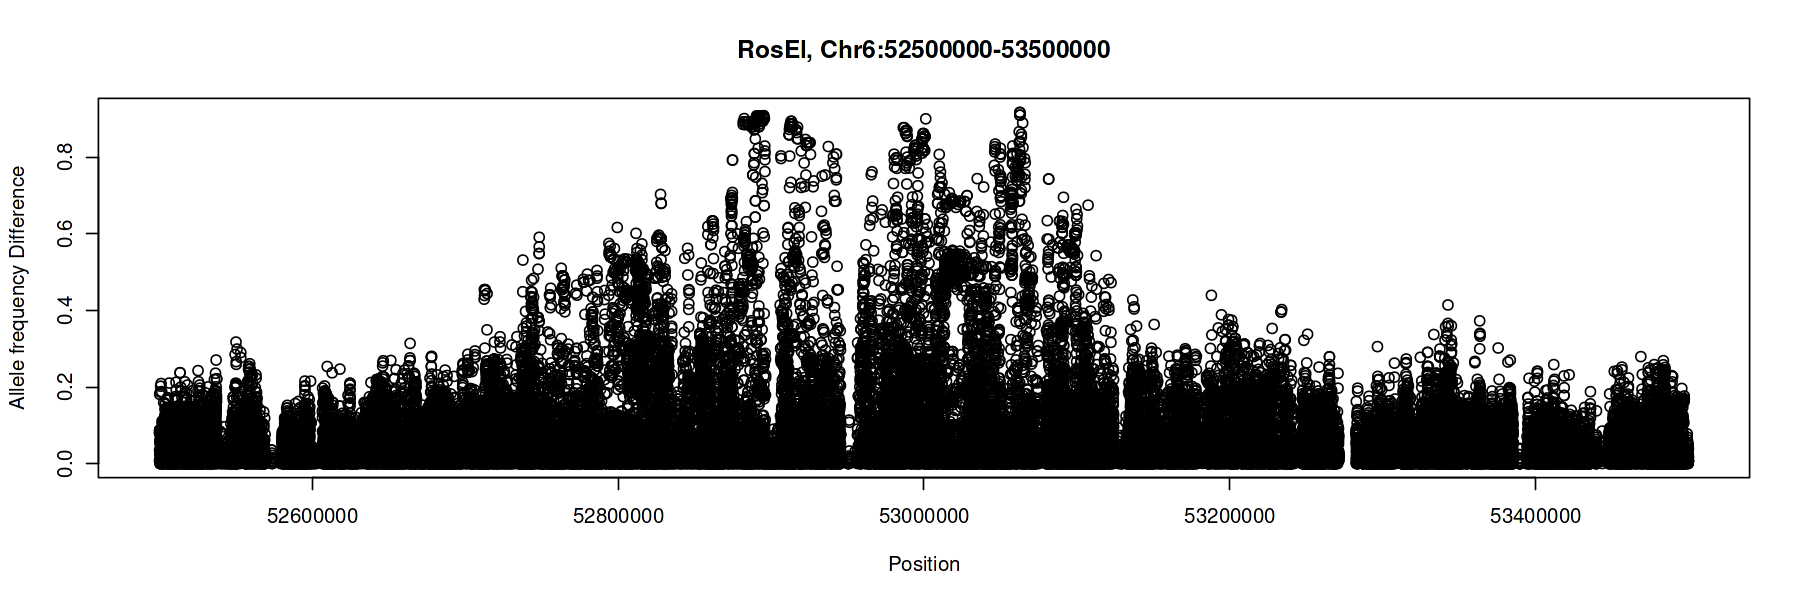

In [45]:
options(repr.plot.width=15, repr.plot.height=5)
plot(frq$pos, frq$frqDiff, xlab='Position', ylab='Allele frequency Difference', main='RosEl, Chr6:52500000-53500000')

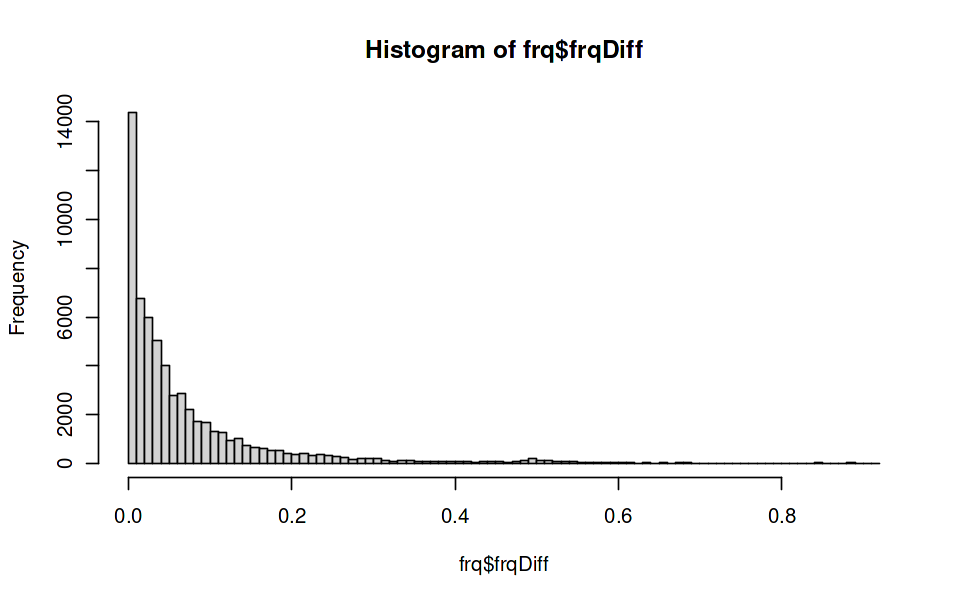

In [28]:
options(repr.plot.width=8, repr.plot.height=5)
hist(frq$frqDiff, breaks=100)

In [44]:
cat('RosEl\n')
cat('\nTotal no. of sites:', nrow(frq))
cat('\nSites with frequency difference = 1:', sum(frq$frqDiff == 1))
cat('\nSites with frequency difference >= 0.9:', sum(frq$frqDiff >= 0.9))
cat('\nSites with frequency difference >= 0.8:', sum(frq$frqDiff >= 0.8))
cat('\nSites with frequency difference >= 0.7:', sum(frq$frqDiff >= 0.7))
cat('\nSites with frequency difference >= 0.6:', sum(frq$frqDiff >= 0.6))

RosEl

Total no. of sites: 61731
Sites with frequency difference = 1: 0
Sites with frequency difference >= 0.9: 22
Sites with frequency difference >= 0.8: 197
Sites with frequency difference >= 0.7: 327
Sites with frequency difference >= 0.6: 574

In [37]:
stats_win10k_s1k = fread('./popgenStats/mFRyYe/mFRyYe_RosEl_coordinate_w10000_s1000.csv.gz')
stats_win10k_s1k = stats_win10k_s1k[start >= 52500000 & end <= 53500000]
str(stats_win10k_s1k)

Classes ‘data.table’ and 'data.frame':	991 obs. of  9 variables:
 $ scaffold   : chr  "Chr6" "Chr6" "Chr6" "Chr6" ...
 $ start      : int  52500001 52501001 52502001 52503001 52504001 52505001 52506001 52507001 52508001 52509001 ...
 $ end        : int  52510000 52511000 52512000 52513000 52514000 52515000 52516000 52517000 52518000 52519000 ...
 $ mid        : num  52505414 52506362 52507090 52508020 52509033 ...
 $ sites      : int  696 734 751 772 787 777 760 805 780 811 ...
 $ pi_mFR     : num  0.142 0.144 0.143 0.148 0.147 ...
 $ pi_yYe     : num  0.139 0.145 0.148 0.155 0.159 ...
 $ dxy_mFR_yYe: num  0.143 0.147 0.148 0.154 0.155 ...
 $ Fst_mFR_yYe: num  0.0092 0.0087 0.0083 0.0078 0.0089 0.0077 0.0064 0.0057 0.0058 0.0062 ...
 - attr(*, ".internal.selfref")=<externalptr> 


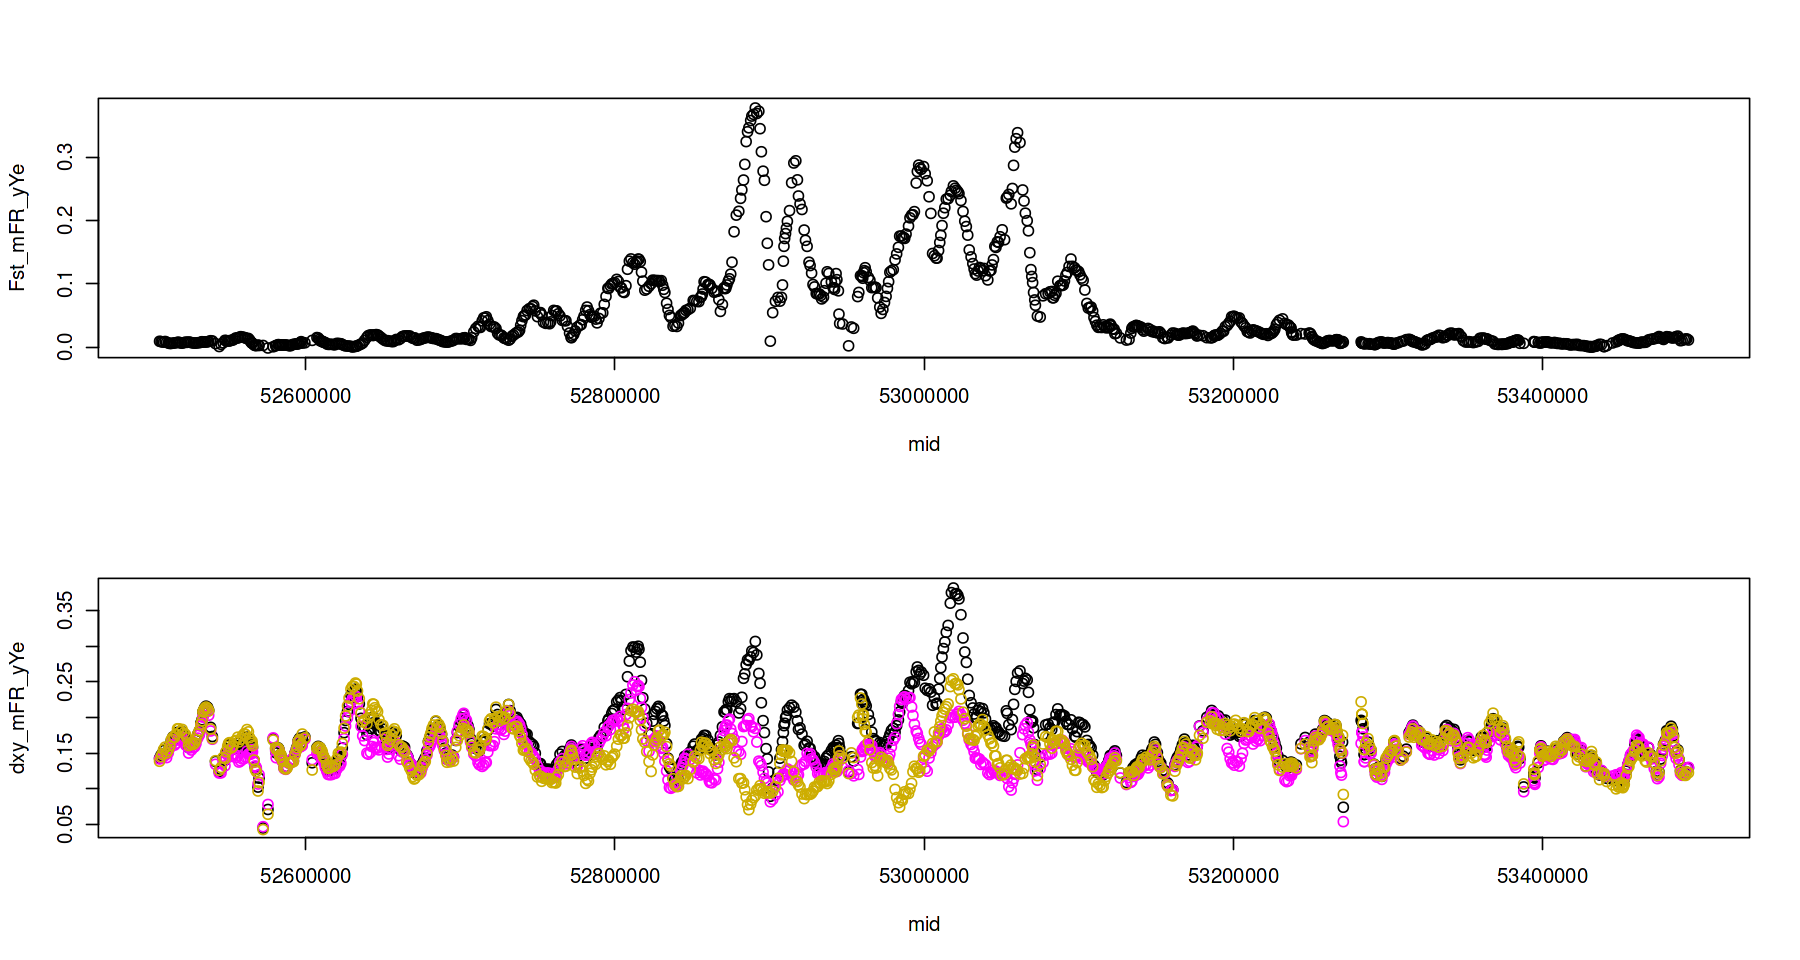

In [42]:
options(repr.plot.width=15, repr.plot.height=8)
par(mfrow=c(2,1))
plot(Fst_mFR_yYe~mid, stats_win10k_s1k)

plot(dxy_mFR_yYe~mid, stats_win10k_s1k)
points(pi_mFR~mid, stats_win10k_s1k, col='magenta')
points(pi_yYe~mid, stats_win10k_s1k, col='gold3')

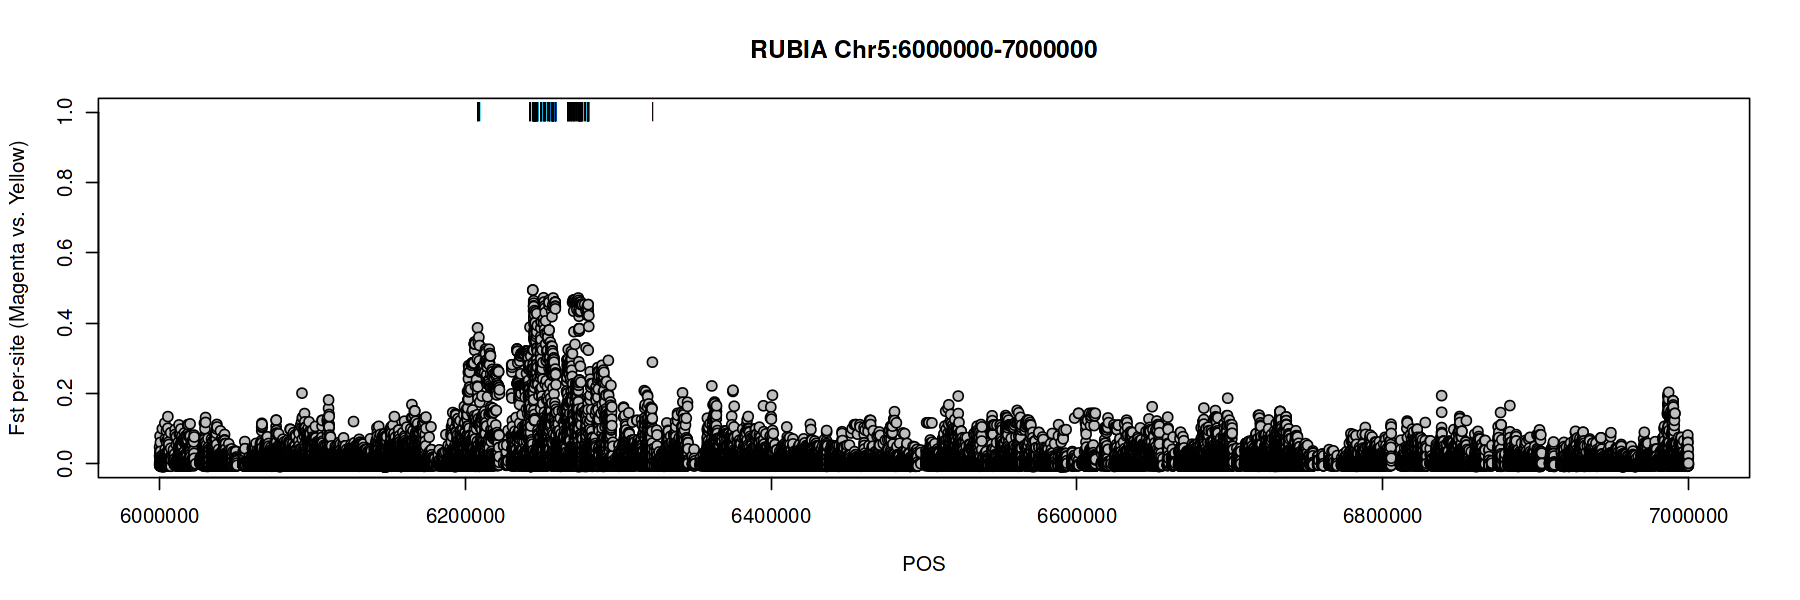

In [94]:
options(repr.plot.width=15, repr.plot.height=5)
plot(WEIR_AND_COCKERHAM_FST~POS, fst_RUBIA, ylim=c(0,1), col='black', bg='grey', alpha=0.2, pch=21,
         ylab='Fst per-site (Magenta vs. Yellow)', main='RUBIA Chr5:6000000-7000000')
points(rep(1, nrow(MAF_RUBIA[dp>0.4]))~position, MAF_RUBIA[dp>0.4], pch='|')

In [95]:
pdf('./_figures/plt_Fst-perSite_RUBIA.pdf', width=15, height=4)
plot(WEIR_AND_COCKERHAM_FST~POS, fst_RUBIA, ylim=c(0,1), col='black', bg='grey', alpha=0.2, pch=21,
         ylab='Fst per-site (Magenta vs. Yellow)', main='RUBIA Chr5:6000000-7000000')
points(rep(1, nrow(MAF_RUBIA[dp>0.4]))~position, MAF_RUBIA[dp>0.4], pch='|')
dev.off()

png 
  2

In [47]:
pi_mFR = fread('./pops_mFR_yYe/RosEl.mFR.sites.pi')
pi_yYe = fread('./pops_mFR_yYe/RosEl.yYe.sites.pi')
fst_mFRyYe = fread('./pops_mFR_yYe/RosEl.mFR.yYe.weir.fst')

In [49]:
str(pi_mFR)
str(pi_yYe)
str(fst_mFRyYe)

Classes ‘data.table’ and 'data.frame':	61731 obs. of  3 variables:
 $ CHROM: chr  "Chr6" "Chr6" "Chr6" "Chr6" ...
 $ POS  : int  52500036 52500059 52500063 52500072 52500078 52500091 52500111 52500124 52500138 52500147 ...
 $ PI   : num  0.2334 0 0.0684 0.2334 0.2334 ...
 - attr(*, ".internal.selfref")=<externalptr> 
Classes ‘data.table’ and 'data.frame':	61731 obs. of  3 variables:
 $ CHROM: chr  "Chr6" "Chr6" "Chr6" "Chr6" ...
 $ POS  : int  52500036 52500059 52500063 52500072 52500078 52500091 52500111 52500124 52500138 52500147 ...
 $ PI   : num  0.1027 0.0154 0 0.1027 0.1027 ...
 - attr(*, ".internal.selfref")=<externalptr> 
Classes ‘data.table’ and 'data.frame':	61731 obs. of  3 variables:
 $ CHROM                 : chr  "Chr6" "Chr6" "Chr6" "Chr6" ...
 $ POS                   : int  52500036 52500059 52500063 52500072 52500078 52500091 52500111 52500124 52500138 52500147 ...
 $ WEIR_AND_COCKERHAM_FST: num  0.029384 0.000685 0.026813 0.029384 0.029384 ...
 - attr(*, ".internal.se

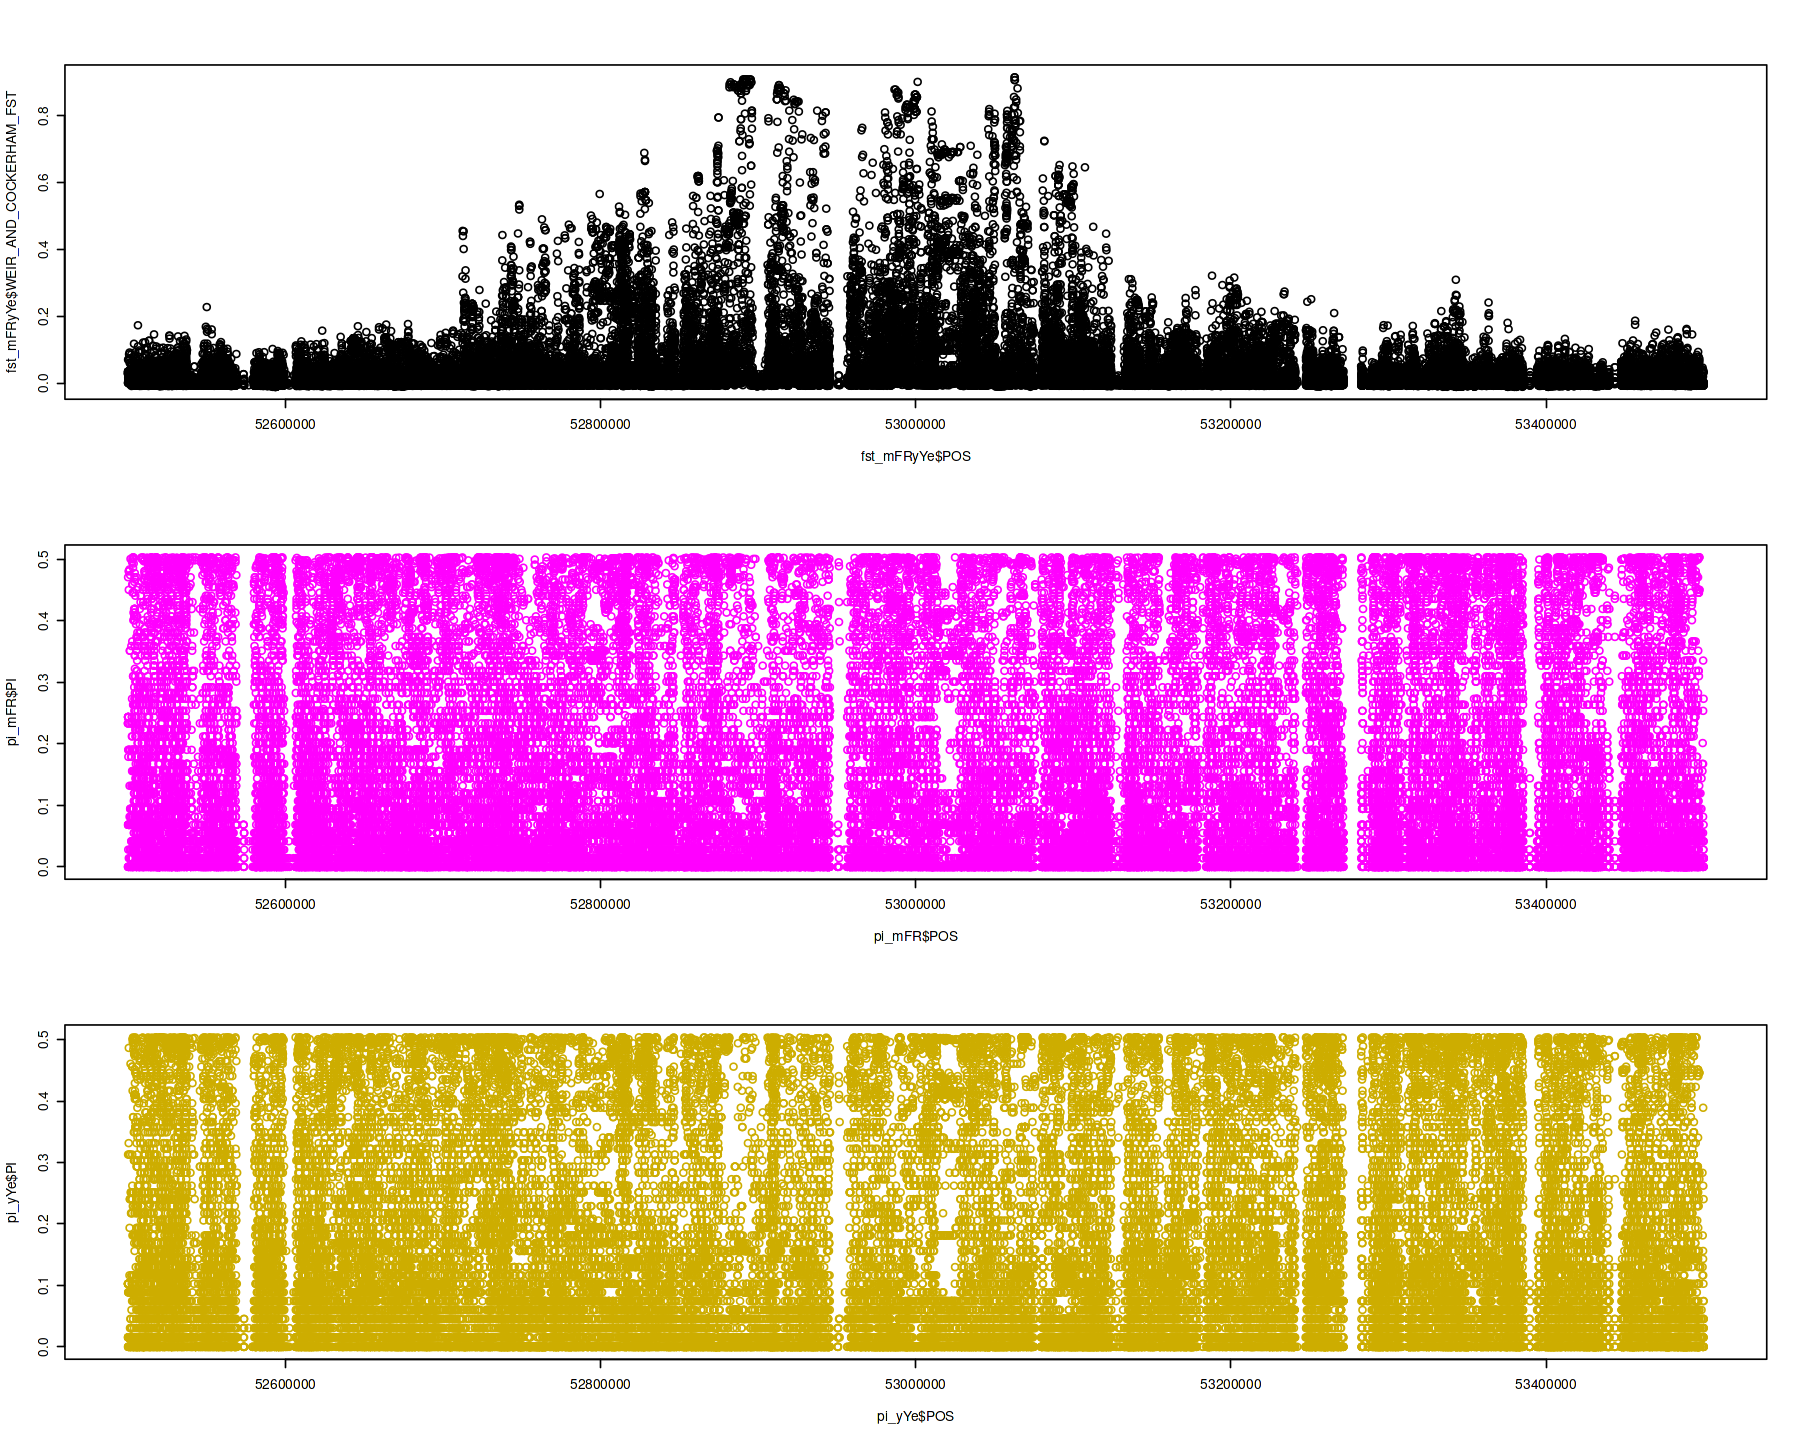

In [51]:
options(repr.plot.width=15, repr.plot.height=12)
par(mfrow=c(3,1))
plot(fst_mFRyYe$POS, fst_mFRyYe$WEIR_AND_COCKERHAM_FST)
plot(pi_mFR$POS, pi_mFR$PI, col='magenta')
plot(pi_yYe$POS, pi_yYe$PI, col='gold3')

### RosEl Chr6:52500000-53500000

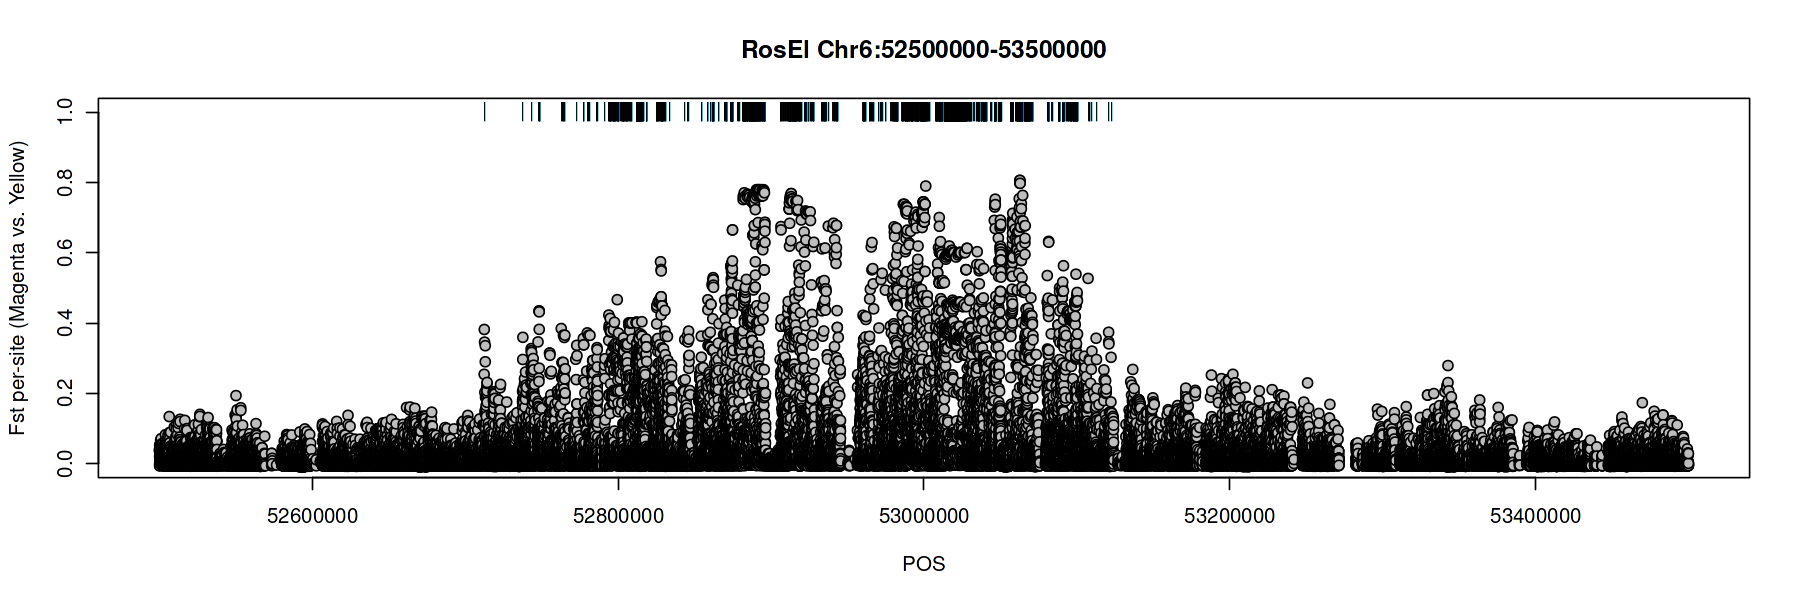

In [33]:
options(repr.plot.width=15, repr.plot.height=5)
plot(WEIR_AND_COCKERHAM_FST~POS, fst_ROSEL, ylim=c(0,1), 
     col='black', bg='grey', alpha=0.2, pch=21,
    ylab='Fst per-site (Magenta vs. Yellow)', main='RosEl Chr6:52500000-53500000')
points(rep(1, nrow(MAF_ROSEL[dp>0.4]))~position, MAF_ROSEL[dp>0.4], pch='|')

In [97]:
pdf('./_figures/plt_Fst-perSite_ROSEL.pdf', width=15, height=4)
plot(WEIR_AND_COCKERHAM_FST~POS, fst_ROSEL, ylim=c(0,1), 
     col='black', bg='grey', alpha=0.2, pch=21,
    ylab='Fst per-site (Magenta vs. Yellow)', main='RosEl Chr6:52500000-53500000')
points(rep(1, nrow(MAF_ROSEL[dp>0.4]))~position, MAF_ROSEL[dp>0.4], pch='|')
dev.off()

png 
  2

Warning message in plot.window(...):
“"alpha" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"alpha" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"alpha" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"alpha" is not a graphical parameter”
Warning message in box(...):
“"alpha" is not a graphical parameter”
Warning message in title(...):
“"alpha" is not a graphical parameter”


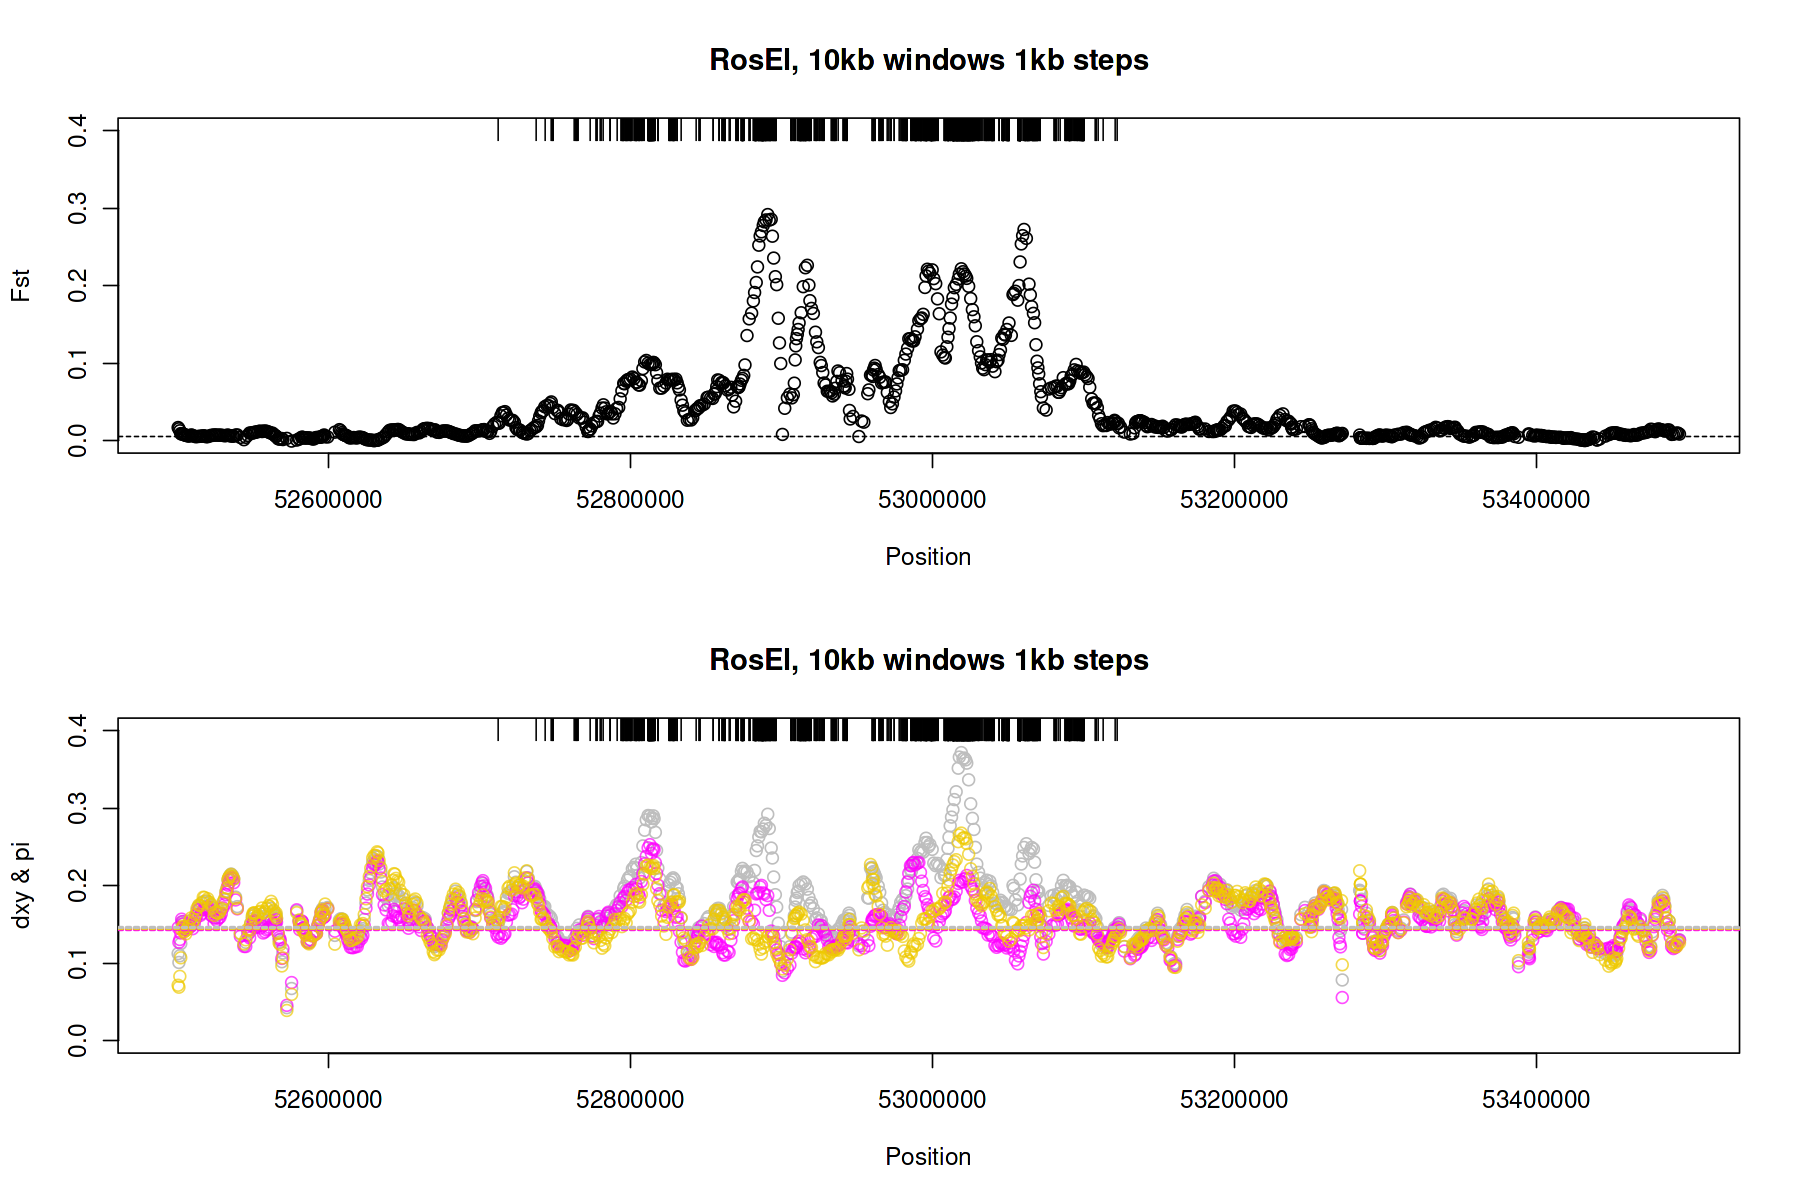

In [70]:
options(repr.plot.width=15, repr.plot.height=10)
par(mfrow=c(2,1), cex=1.2)

## Fst plot
plot(Fst_MF_YF~mid, stats_Win10k_step1k_RosEL[sites>10], 
     ylim=c(0,0.4), ylab='Fst', xlab='Position', main='RosEl, 10kb windows 1kb steps')
points(rep(0.4, nrow(MAF_ROSEL[dp>0.4]))~position, MAF_ROSEL[dp>0.4], pch='|')
abline(h = mean_Fst_Chr6, lty = 2) # mean Fst across Chr6


## pi and dxy plot
plot(dxy_MF_YF~mid, stats_Win10k_step1k_RosEL[sites>10], col='grey', alpha=0.5,
     ylim=c(0,0.4), ylab='dxy & pi', xlab='Position', main='RosEl, 10kb windows 1kb steps')
points(pi_MF~mid, stats_Win10k_step1k_RosEL, col=alpha('magenta',0.7))
points(pi_YF~mid, stats_Win10k_step1k_RosEL, col=alpha('gold2',0.7))
points(rep(0.4, nrow(MAF_ROSEL[dp>0.4]))~position, MAF_ROSEL[dp>0.4], pch='|')
abline(h = mean_piM_Chr6, col='magenta', lty=2, lwd=2) # Mean piM Chr6
abline(h = mean_piY_Chr6, col='gold2', lty=2, lwd=2) # Mean piY Chr6
abline(h = mean_dxy_Chr6, col='grey', lty=2, lwd=2) # Mean dxy Chr6

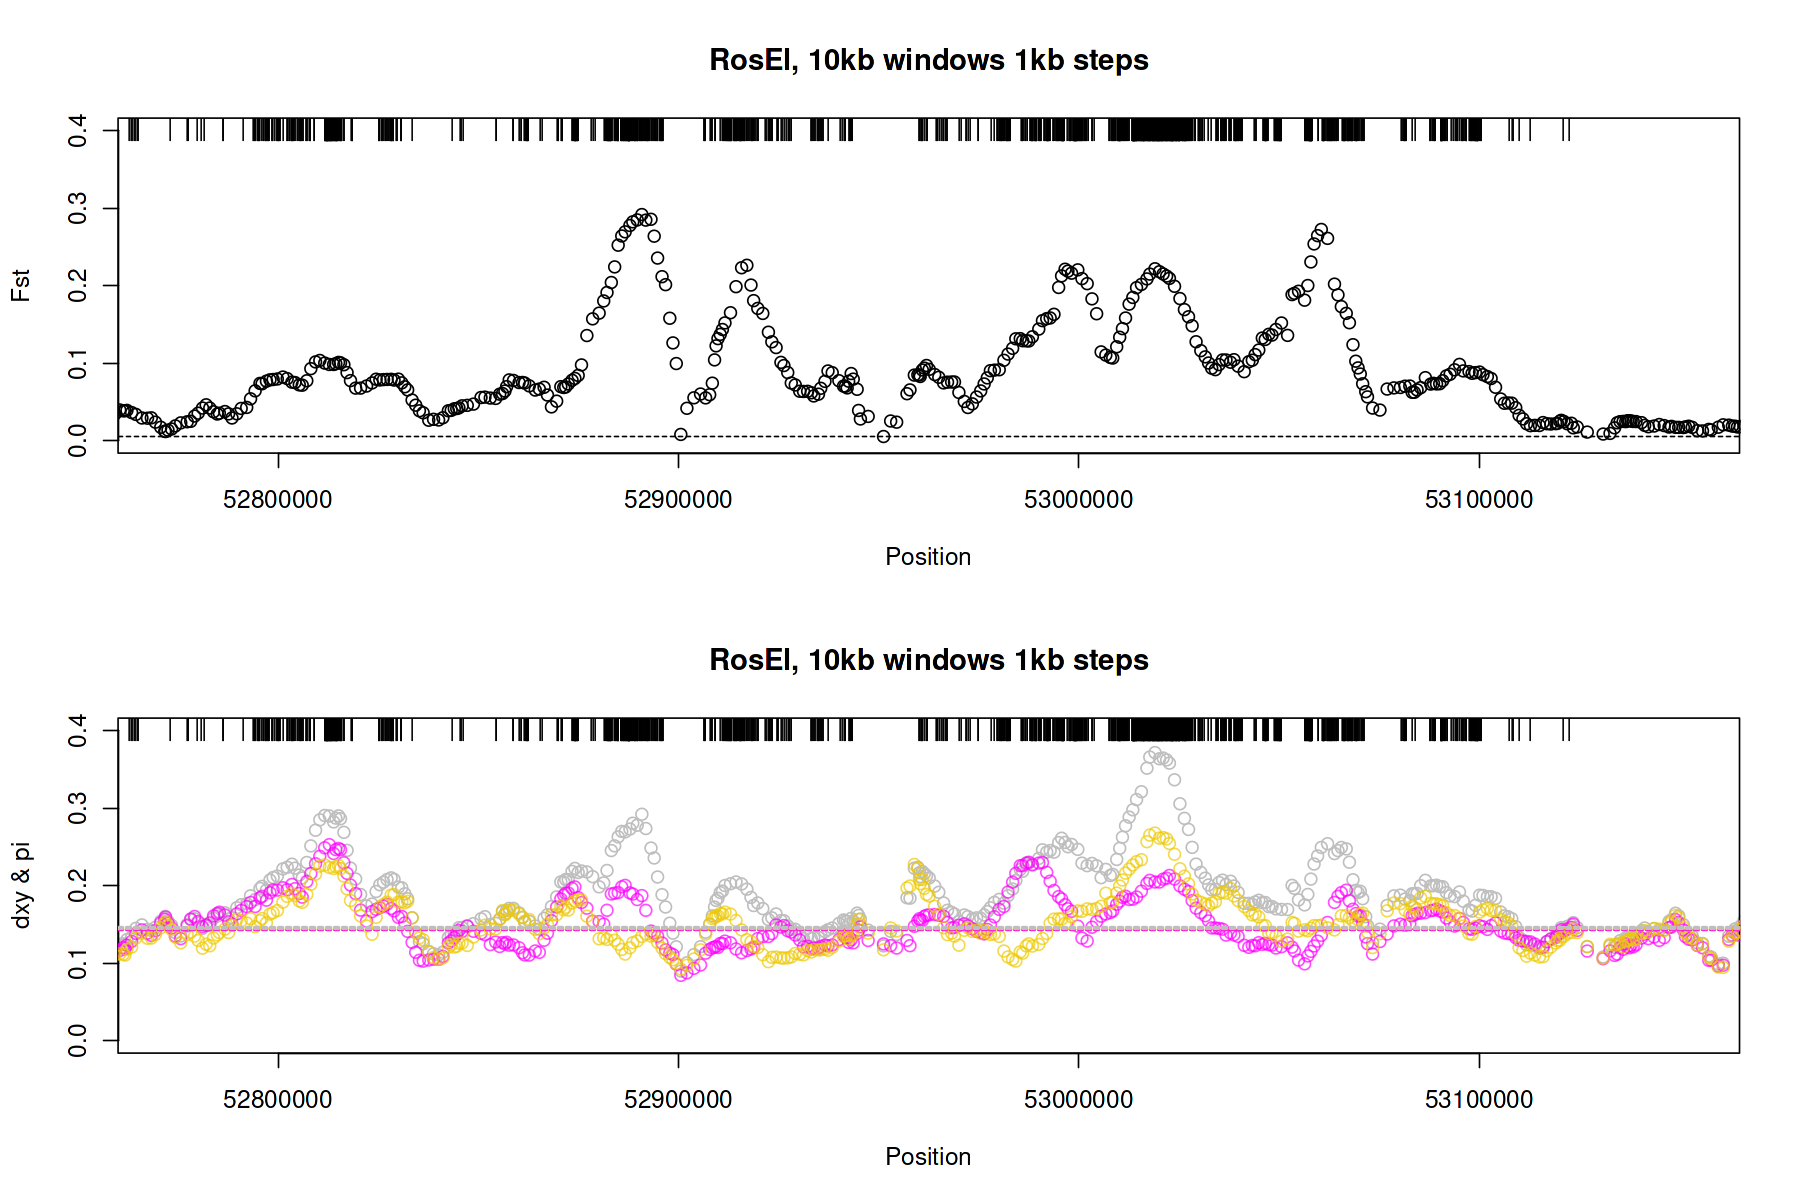

In [71]:
options(repr.plot.width=15, repr.plot.height=10)
par(mfrow=c(2,1), cex=1.2)
RosEL_zoomIn = c(52775014, 53149974)

## Fst plot
plot(Fst_MF_YF~mid, stats_Win10k_step1k_RosEL[sites>10], 
     ylim=c(0,0.4), xlim=RosEL_zoomIn, ylab='Fst', xlab='Position', main='RosEl, 10kb windows 1kb steps')
points(rep(0.4, nrow(MAF_ROSEL[dp>0.4]))~position, MAF_ROSEL[dp>0.4], pch='|')
abline(h = mean_Fst_Chr6, lty = 2) # mean Fst across Chr6

## pi and dxy plot
plot(dxy_MF_YF~mid, stats_Win10k_step1k_RosEL[sites>10], col=alpha('grey', 1),
     ylim=c(0,0.4), xlim=RosEL_zoomIn, ylab='dxy & pi', xlab='Position', main='RosEl, 10kb windows 1kb steps')
points(pi_MF~mid, stats_Win10k_step1k_RosEL, col=alpha('magenta',0.7))
points(pi_YF~mid, stats_Win10k_step1k_RosEL, col=alpha('gold2',0.7))
points(rep(0.4, nrow(MAF_ROSEL[dp>0.4]))~position, MAF_ROSEL[dp>0.4], pch='|')
abline(h = mean_piM_Chr6, col='magenta', lty=2, lwd=2) # Mean piM Chr6
abline(h = mean_piY_Chr6, col='gold2', lty=2, lwd=2) # Mean piY Chr6
abline(h = mean_dxy_Chr6, col='grey', lty=2, lwd=2) # Mean dxy Chr6

In [6]:
Chr6_AvePla = fread('./popgenStats/AvePla_Chr6_w10000.csv.gz', header=T)
Chr6_MY = fread('./popgenStats/Chr6_w10000.csv.gz', header=T)

In [7]:
str(Chr6_MY)

Classes ‘data.table’ and 'data.frame':	5570 obs. of  9 variables:
 $ scaffold : chr  "Chr6" "Chr6" "Chr6" "Chr6" ...
 $ start    : int  1 10001 20001 30001 40001 50001 60001 70001 80001 90001 ...
 $ end      : int  10000 20000 30000 40000 50000 60000 70000 80000 90000 100000 ...
 $ mid      : num  NaN 16714 21197 36356 42683 ...
 $ sites    : int  0 175 105 749 43 0 0 5 82 70 ...
 $ pi_MF    : num  NaN 0.1122 0.1152 0.1596 0.0747 ...
 $ pi_YF    : num  NaN 0.1121 0.1111 0.1495 0.0582 ...
 $ dxy_MF_YF: num  NaN 0.1125 0.1134 0.1544 0.0668 ...
 $ Fst_MF_YF: num  NaN 0.0014 0.0011 -0.0005 0.0028 NaN NaN -0.0024 -0.0001 0.001 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [9]:
str(Chr6_AvePla)

Classes ‘data.table’ and 'data.frame':	5570 obs. of  9 variables:
 $ scaffold   : chr  "Chr6" "Chr6" "Chr6" "Chr6" ...
 $ start      : int  1 10001 20001 30001 40001 50001 60001 70001 80001 90001 ...
 $ end        : int  10000 20000 30000 40000 50000 60000 70000 80000 90000 100000 ...
 $ mid        : num  NaN 16714 21197 36356 42683 ...
 $ sites      : int  0 175 105 749 43 0 0 5 82 70 ...
 $ pi_Ave     : num  NaN 0.102 0.099 0.123 0.106 ...
 $ pi_Pla     : num  NaN 0.0971 0.0775 0.1308 0.0582 ...
 $ dxy_Ave_Pla: num  NaN 0.1018 0.0925 0.131 0.0964 ...
 $ Fst_Ave_Pla: num  NaN 0.0118 0.0239 0.0155 0.0821 NaN NaN 0.0072 0.0452 0.0863 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [3]:
Chr1_MY = fread('./popgenStats/MY_Chr1_w10000.csv.gz', header=T)
Chr2_MY = fread('./popgenStats/MY_Chr2_w10000.csv.gz', header=T)
Chr3_MY = fread('./popgenStats/MY_Chr3_w10000.csv.gz', header=T)
Chr4_MY = fread('./popgenStats/MY_Chr4_w10000.csv.gz', header=T)
Chr5_MY = fread('./popgenStats/MY_Chr5_w10000.csv.gz', header=T)
Chr6_MY = fread('./popgenStats/MY_Chr6_w10000.csv.gz', header=T)
Chr7_MY = fread('./popgenStats/MY_Chr7_w10000.csv.gz', header=T)
Chr8_MY = fread('./popgenStats/MY_Chr8_w10000.csv.gz', header=T)

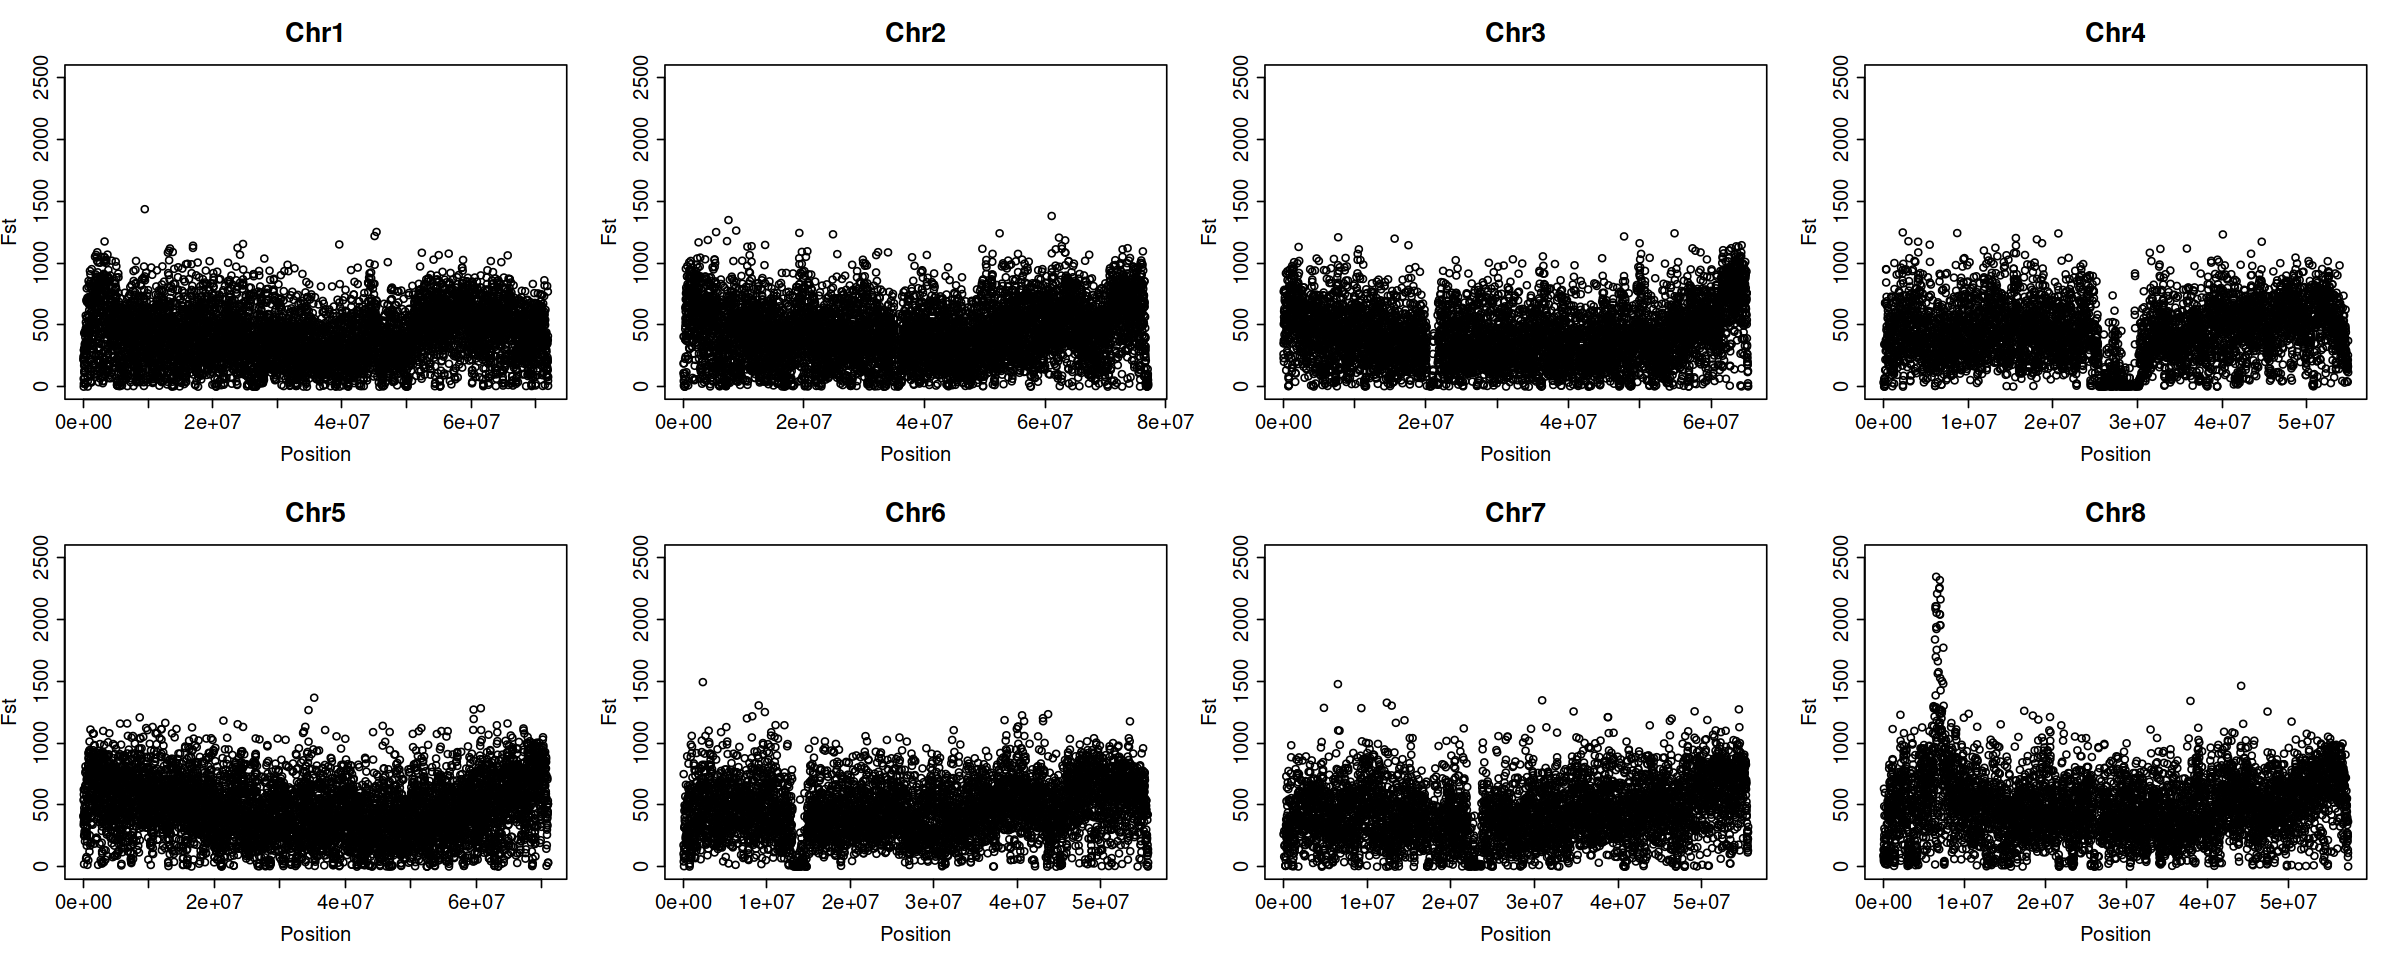

In [6]:
options(repr.plot.width=20, repr.plot.height=8)
xLabel='Position'
yLabel='Fst'
# xLimit=
yLimit=c(0,2500)

par(mfrow=c(2,4), cex.lab = 1.5, cex.axis = 1.5, cex.main = 2)

plot(Chr1_MY$mid, Chr1_MY$sites, xlab=xLabel, ylab=yLabel, ylim=yLimit, main='Chr1')
plot(Chr2_MY$mid, Chr2_MY$sites, xlab=xLabel, ylab=yLabel, ylim=yLimit, main='Chr2')
plot(Chr3_MY$mid, Chr3_MY$sites, xlab=xLabel, ylab=yLabel, ylim=yLimit, main='Chr3')
plot(Chr4_MY$mid, Chr4_MY$sites, xlab=xLabel, ylab=yLabel, ylim=yLimit, main='Chr4')
plot(Chr5_MY$mid, Chr5_MY$sites, xlab=xLabel, ylab=yLabel, ylim=yLimit, main='Chr5')
plot(Chr6_MY$mid, Chr6_MY$sites, xlab=xLabel, ylab=yLabel, ylim=yLimit, main='Chr6')
plot(Chr7_MY$mid, Chr7_MY$sites, xlab=xLabel, ylab=yLabel, ylim=yLimit, main='Chr7')
plot(Chr8_MY$mid, Chr8_MY$sites, xlab=xLabel, ylab=yLabel, ylim=yLimit, main='Chr8')

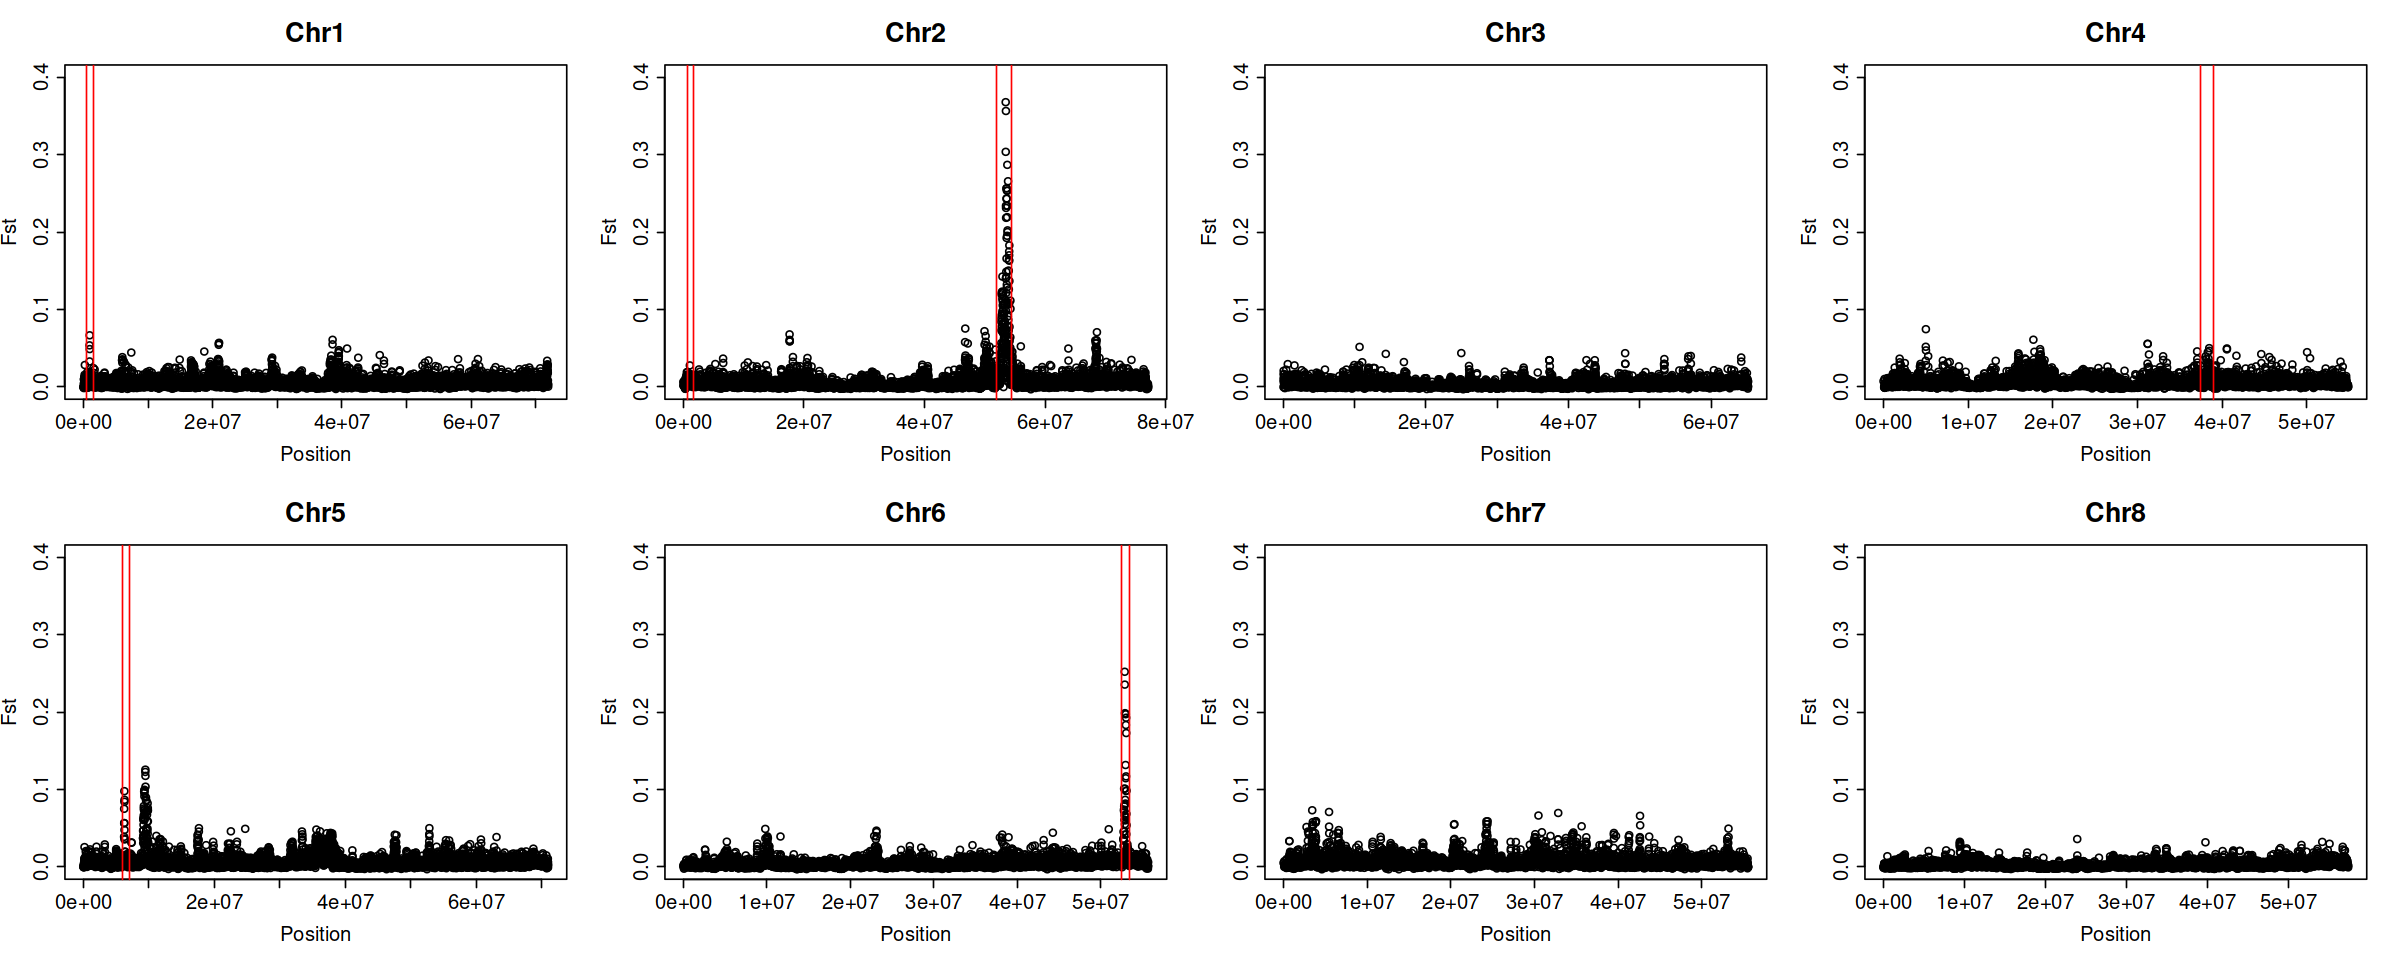

In [14]:
options(repr.plot.width=20, repr.plot.height=8)
xLabel='Position'
yLabel='Fst'
# xLimit=
yLimit=c(0,0.4)

par(mfrow=c(2,4), cex.lab = 1.5, cex.axis = 1.5, cex.main = 2)

plot(Chr1_MY$mid, Chr1_MY$Fst_MF_YF, xlab=xLabel, ylab=yLabel, ylim=yLimit, main='Chr1')
abline(v=c(500000,1500000), col='red')
plot(Chr2_MY$mid, Chr2_MY$Fst_MF_YF, xlab=xLabel, ylab=yLabel, ylim=yLimit, main='Chr2')
abline(v=c(600000,1600000), col='red')
abline(v=c(52000000,54500000), col='red')
plot(Chr3_MY$mid, Chr3_MY$Fst_MF_YF, xlab=xLabel, ylab=yLabel, ylim=yLimit, main='Chr3')

plot(Chr4_MY$mid, Chr4_MY$Fst_MF_YF, xlab=xLabel, ylab=yLabel, ylim=yLimit, main='Chr4')
abline(v=c(37500000,39000000), col='red')

plot(Chr5_MY$mid, Chr5_MY$Fst_MF_YF, xlab=xLabel, ylab=yLabel, ylim=yLimit, main='Chr5')
abline(v=c(6000000,7000000), col='red')

plot(Chr6_MY$mid, Chr6_MY$Fst_MF_YF, xlab=xLabel, ylab=yLabel, ylim=yLimit, main='Chr6')
abline(v=c(52500000,53500000), col='red')

plot(Chr7_MY$mid, Chr7_MY$Fst_MF_YF, xlab=xLabel, ylab=yLabel, ylim=yLimit, main='Chr7')
plot(Chr8_MY$mid, Chr8_MY$Fst_MF_YF, xlab=xLabel, ylab=yLabel, ylim=yLimit, main='Chr8')

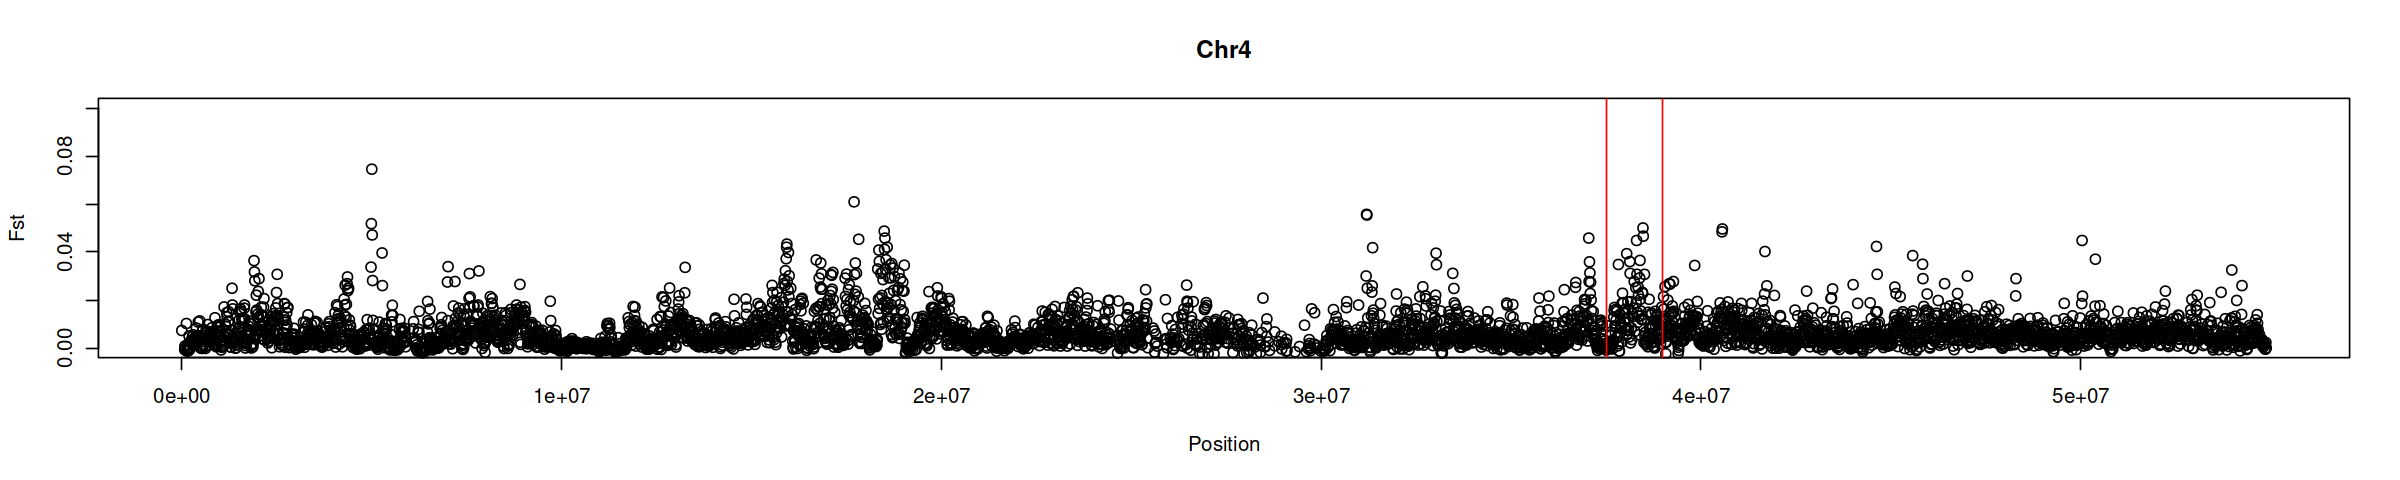

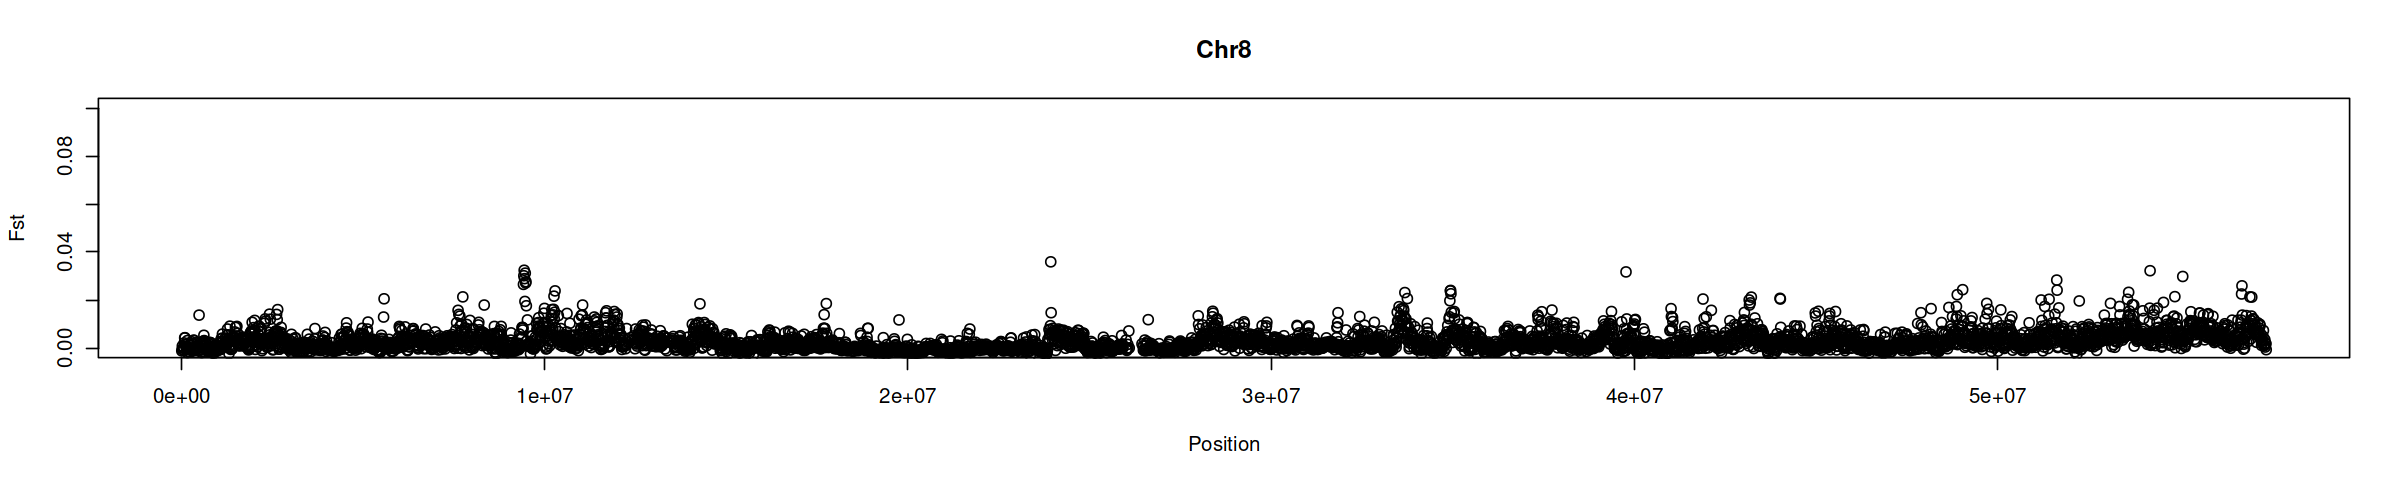

In [12]:
options(repr.plot.width=20, repr.plot.height=4)
xLabel='Position'
yLabel='Fst'
# xLimit=
yLimit=c(0,0.1)

# par(mfrow=c(1,1), cex.lab = 1.5, cex.axis = 1.5, cex.main = 2)

plot(Chr4_MY$mid, Chr4_MY$Fst_MF_YF, xlab=xLabel, ylab=yLabel, ylim=yLimit, main='Chr4')
abline(v=c(37500000,39000000), col='red')
plot(Chr8_MY$mid, Chr8_MY$Fst_MF_YF, xlab=xLabel, ylab=yLabel, ylim=yLimit, main='Chr8')

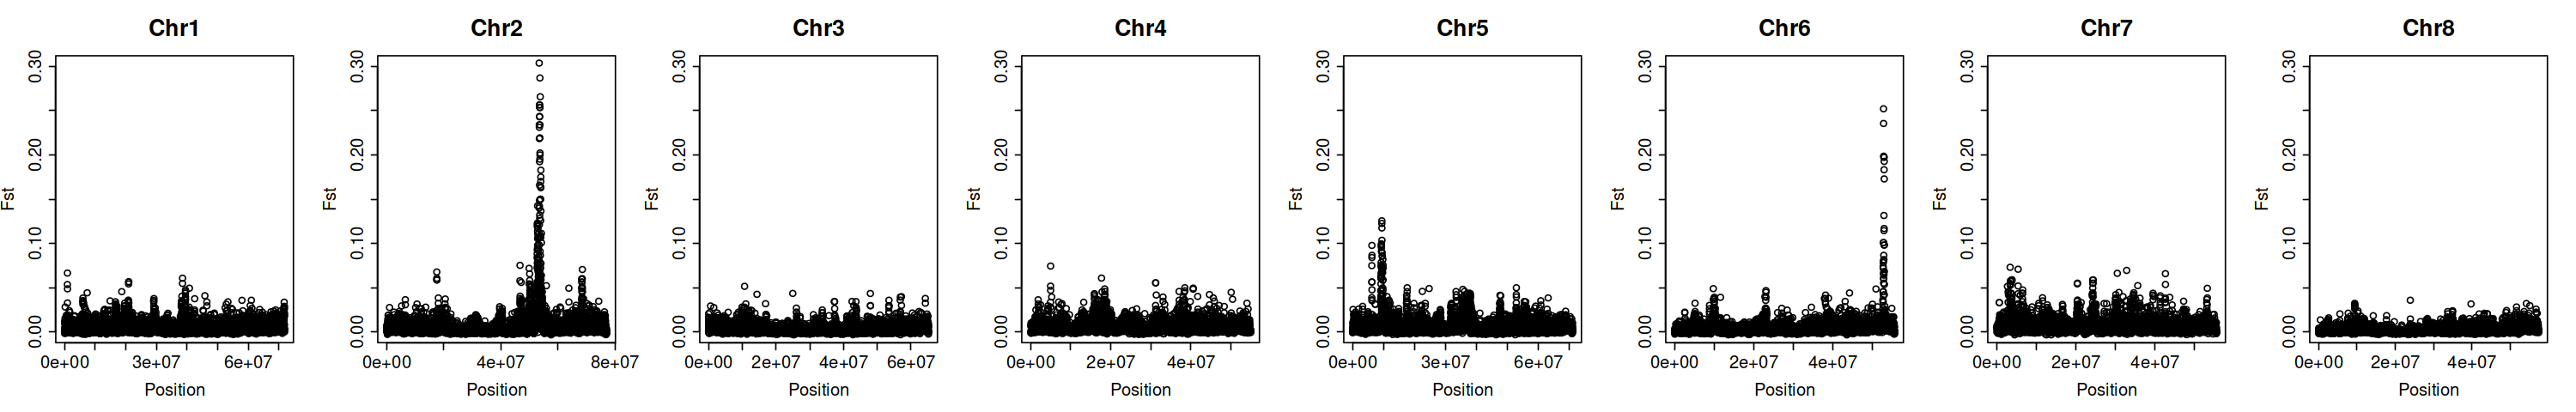

In [31]:
options(repr.plot.width=25, repr.plot.height=4)
xLabel='Position'
yLabel='Fst'
# xLimit=
yLimit=c(0,0.3)

par(mfrow=c(1,8), cex.lab = 1.5, cex.axis = 1.5, cex.main = 2)

plot(Chr1_MY$mid, Chr1_MY$Fst_MF_YF, xlab=xLabel, ylab=yLabel, ylim=yLimit, main='Chr1')
# abline(v=c(500000,1500000), col='red')

plot(Chr2_MY$mid, Chr2_MY$Fst_MF_YF, xlab=xLabel, ylab=yLabel, ylim=yLimit, main='Chr2')
# abline(v=c(600000,1600000), col='red')
# abline(v=c(52000000,54500000), col='red')

plot(Chr3_MY$mid, Chr3_MY$Fst_MF_YF, xlab=xLabel, ylab=yLabel, ylim=yLimit, main='Chr3')

plot(Chr4_MY$mid, Chr4_MY$Fst_MF_YF, xlab=xLabel, ylab=yLabel, ylim=yLimit, main='Chr4')
# abline(v=c(37500000,39000000), col='red')

plot(Chr5_MY$mid, Chr5_MY$Fst_MF_YF, xlab=xLabel, ylab=yLabel, ylim=yLimit, main='Chr5')
# abline(v=c(6000000,7000000), col='red')

plot(Chr6_MY$mid, Chr6_MY$Fst_MF_YF, xlab=xLabel, ylab=yLabel, ylim=yLimit, main='Chr6')
# abline(v=c(52500000,53500000), col='red')

plot(Chr7_MY$mid, Chr7_MY$Fst_MF_YF, xlab=xLabel, ylab=yLabel, ylim=yLimit, main='Chr7')
plot(Chr8_MY$mid, Chr8_MY$Fst_MF_YF, xlab=xLabel, ylab=yLabel, ylim=yLimit, main='Chr8')

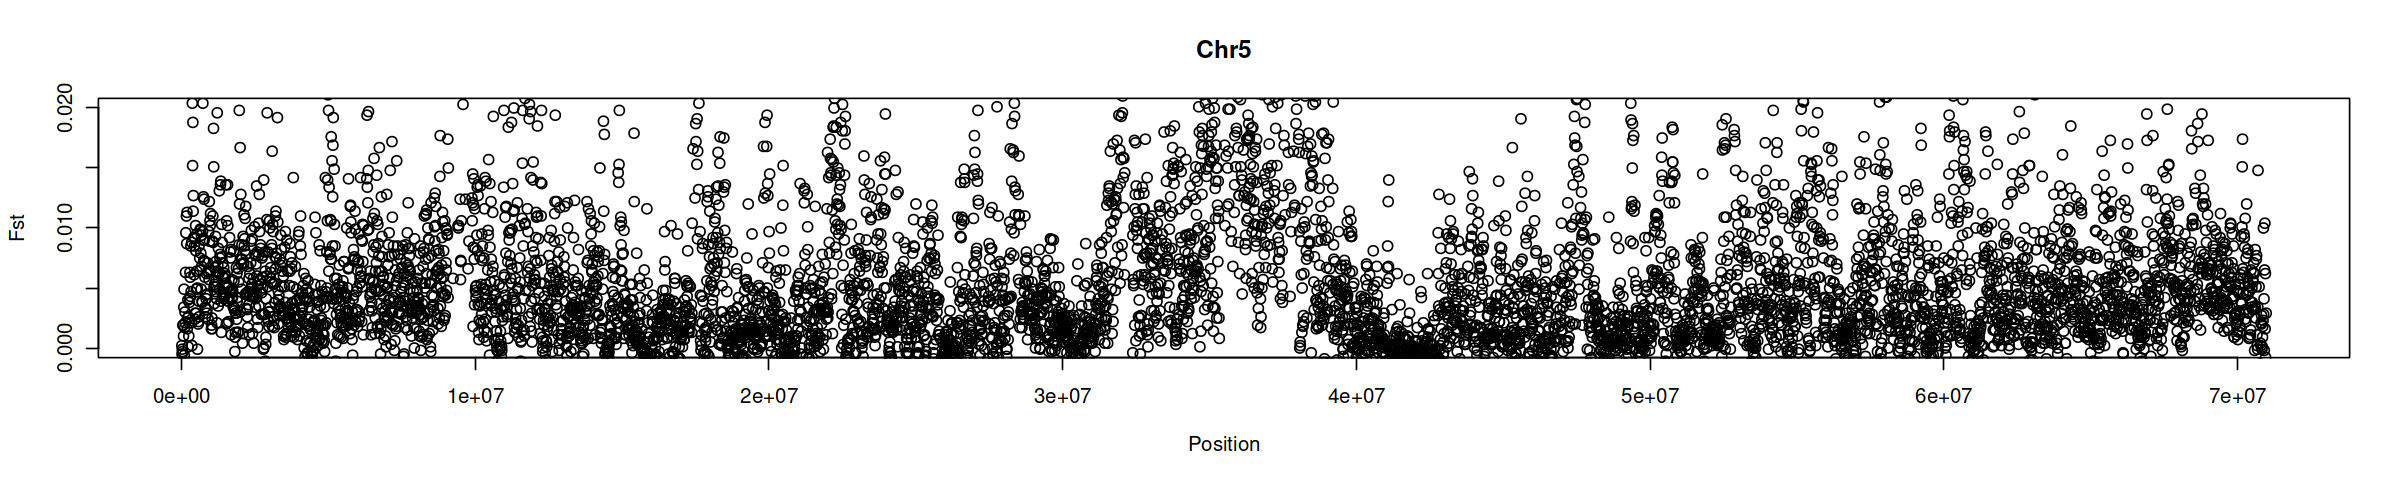

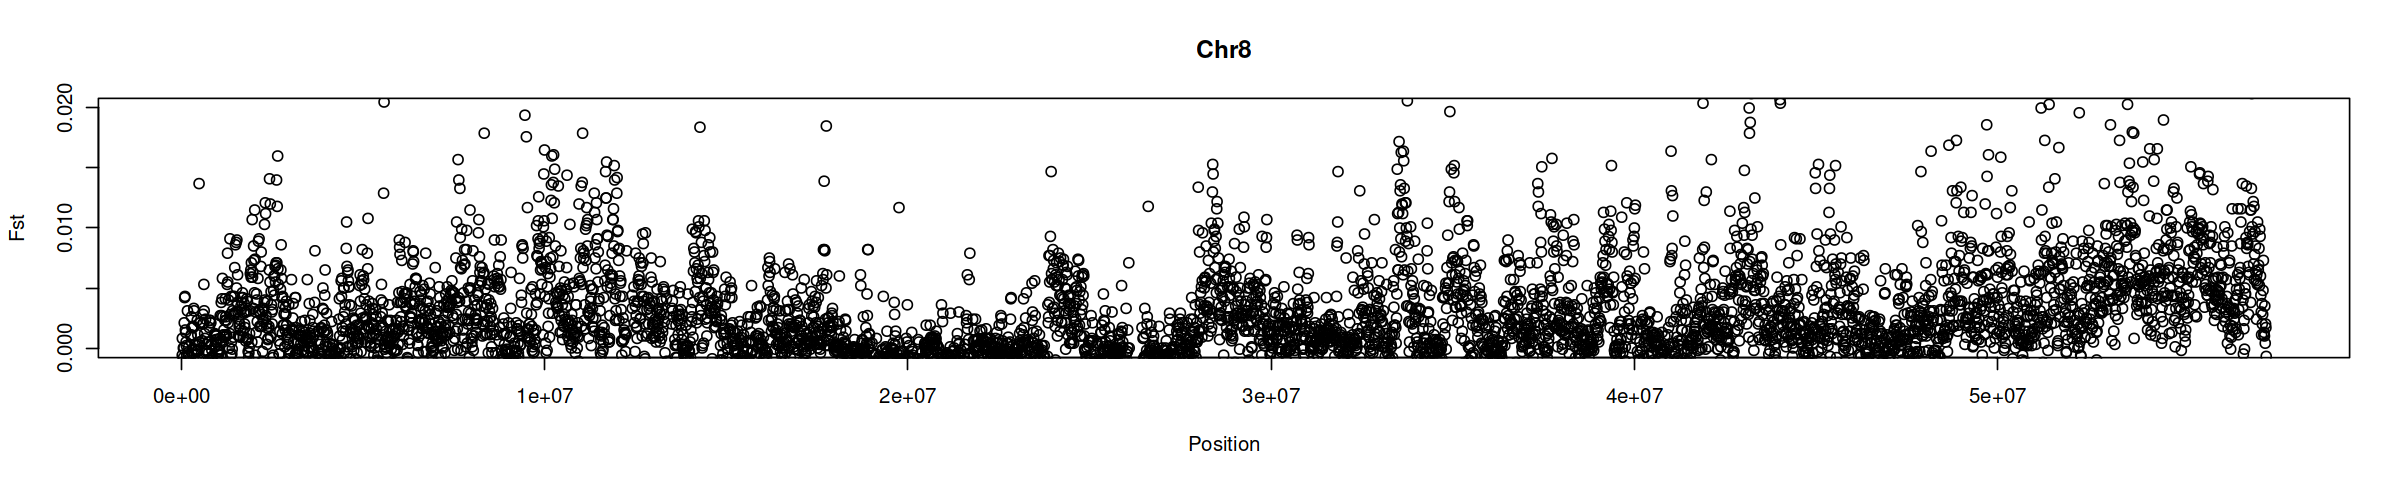

In [53]:
options(repr.plot.width=20, repr.plot.height=4)
xLabel='Position'
yLabel='Fst'
# xLimit=
yLimit=c(0,0.02)

# par(mfrow=c(1,1), cex.lab = 1.5, cex.axis = 1.5, cex.main = 2)

plot(Chr5_MY$mid, Chr5_MY$Fst_MF_YF, xlab=xLabel, ylab=yLabel, ylim=yLimit, main='Chr5')
plot(Chr8_MY$mid, Chr8_MY$Fst_MF_YF, xlab=xLabel, ylab=yLabel, ylim=yLimit, main='Chr8')

In [70]:
options(repr.plot.width=15, repr.plot.height=8)
nBreaks=30
xLimit=c(0,0.25)

violin(Chr1_MY$Fst_MF_YF)

# par(mfrow=c(2,4))
# hist(Chr1_MY$Fst_MF_YF, breaks=nBreaks, xlim=xLimit)
# hist(Chr3_MY$Fst_MF_YF, breaks=nBreaks, xlim=xLimit)
# hist(Chr4_MY$Fst_MF_YF, breaks=nBreaks, xlim=xLimit)
# hist(Chr5_MY$Fst_MF_YF, breaks=nBreaks, xlim=xLimit)
# hist(Chr6_MY$Fst_MF_YF, breaks=nBreaks, xlim=xLimit)
# hist(Chr7_MY$Fst_MF_YF, breaks=nBreaks, xlim=xLimit)
# hist(Chr8_MY$Fst_MF_YF, breaks=nBreaks, xlim=xLimit)

ERROR: Error in violin(Chr1_MY$Fst_MF_YF): could not find function "violin"


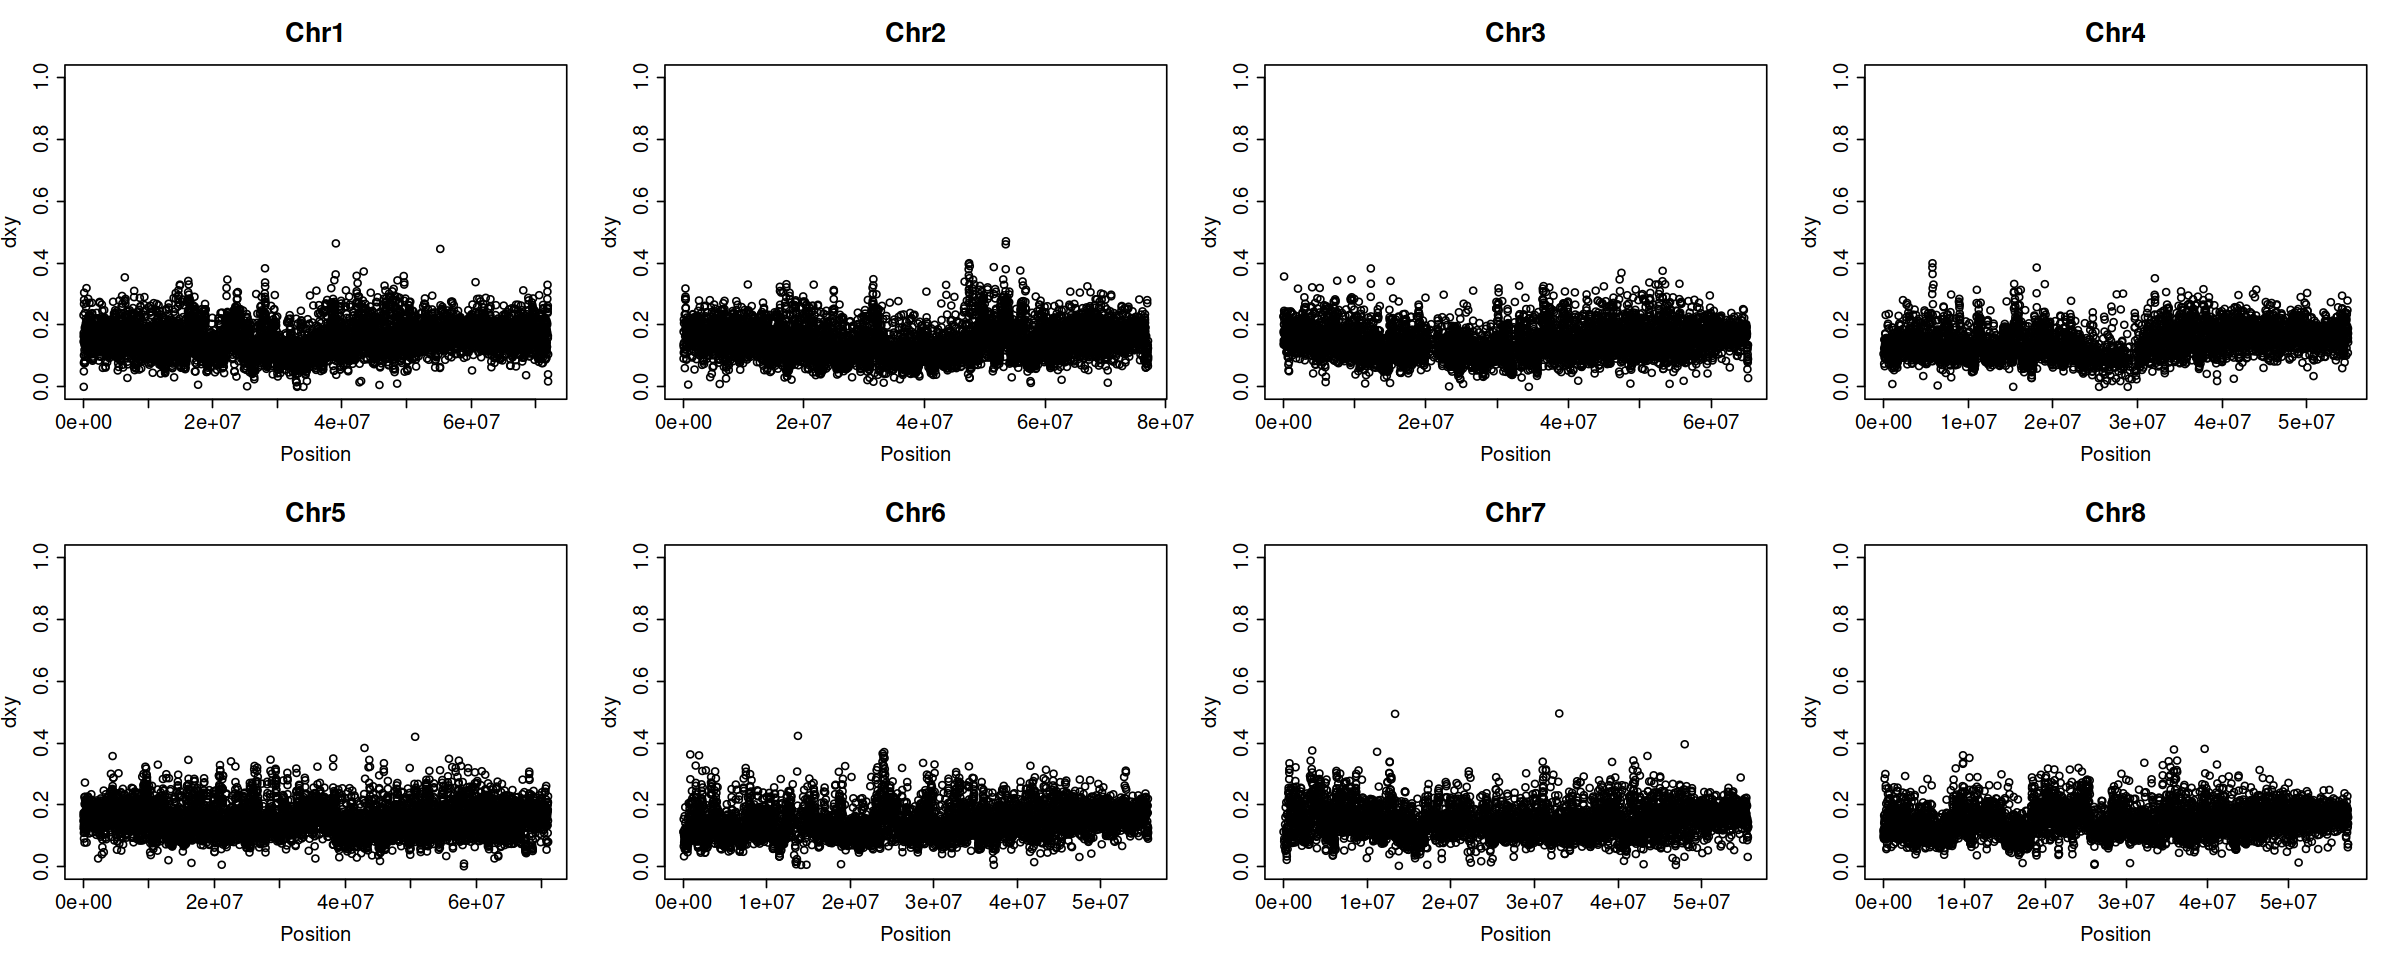

In [10]:
options(repr.plot.width=20, repr.plot.height=8)
xLabel='Position'
yLabel='dxy'
# xLimit=
yLimit=c(0,1)

par(mfrow=c(2,4), cex.lab = 1.5, cex.axis = 1.5, cex.main = 2)

plot(Chr1_MY$mid, Chr1_MY$dxy_MF_YF, xlab=xLabel, ylab=yLabel, ylim=yLimit, main='Chr1')
plot(Chr2_MY$mid, Chr2_MY$dxy_MF_YF, xlab=xLabel, ylab=yLabel, ylim=yLimit, main='Chr2')
plot(Chr3_MY$mid, Chr3_MY$dxy_MF_YF, xlab=xLabel, ylab=yLabel, ylim=yLimit, main='Chr3')
plot(Chr4_MY$mid, Chr4_MY$dxy_MF_YF, xlab=xLabel, ylab=yLabel, ylim=yLimit, main='Chr4')
plot(Chr5_MY$mid, Chr5_MY$dxy_MF_YF, xlab=xLabel, ylab=yLabel, ylim=yLimit, main='Chr5')
plot(Chr6_MY$mid, Chr6_MY$dxy_MF_YF, xlab=xLabel, ylab=yLabel, ylim=yLimit, main='Chr6')
plot(Chr7_MY$mid, Chr7_MY$dxy_MF_YF, xlab=xLabel, ylab=yLabel, ylim=yLimit, main='Chr7')
plot(Chr8_MY$mid, Chr8_MY$dxy_MF_YF, xlab=xLabel, ylab=yLabel, ylim=yLimit, main='Chr8')

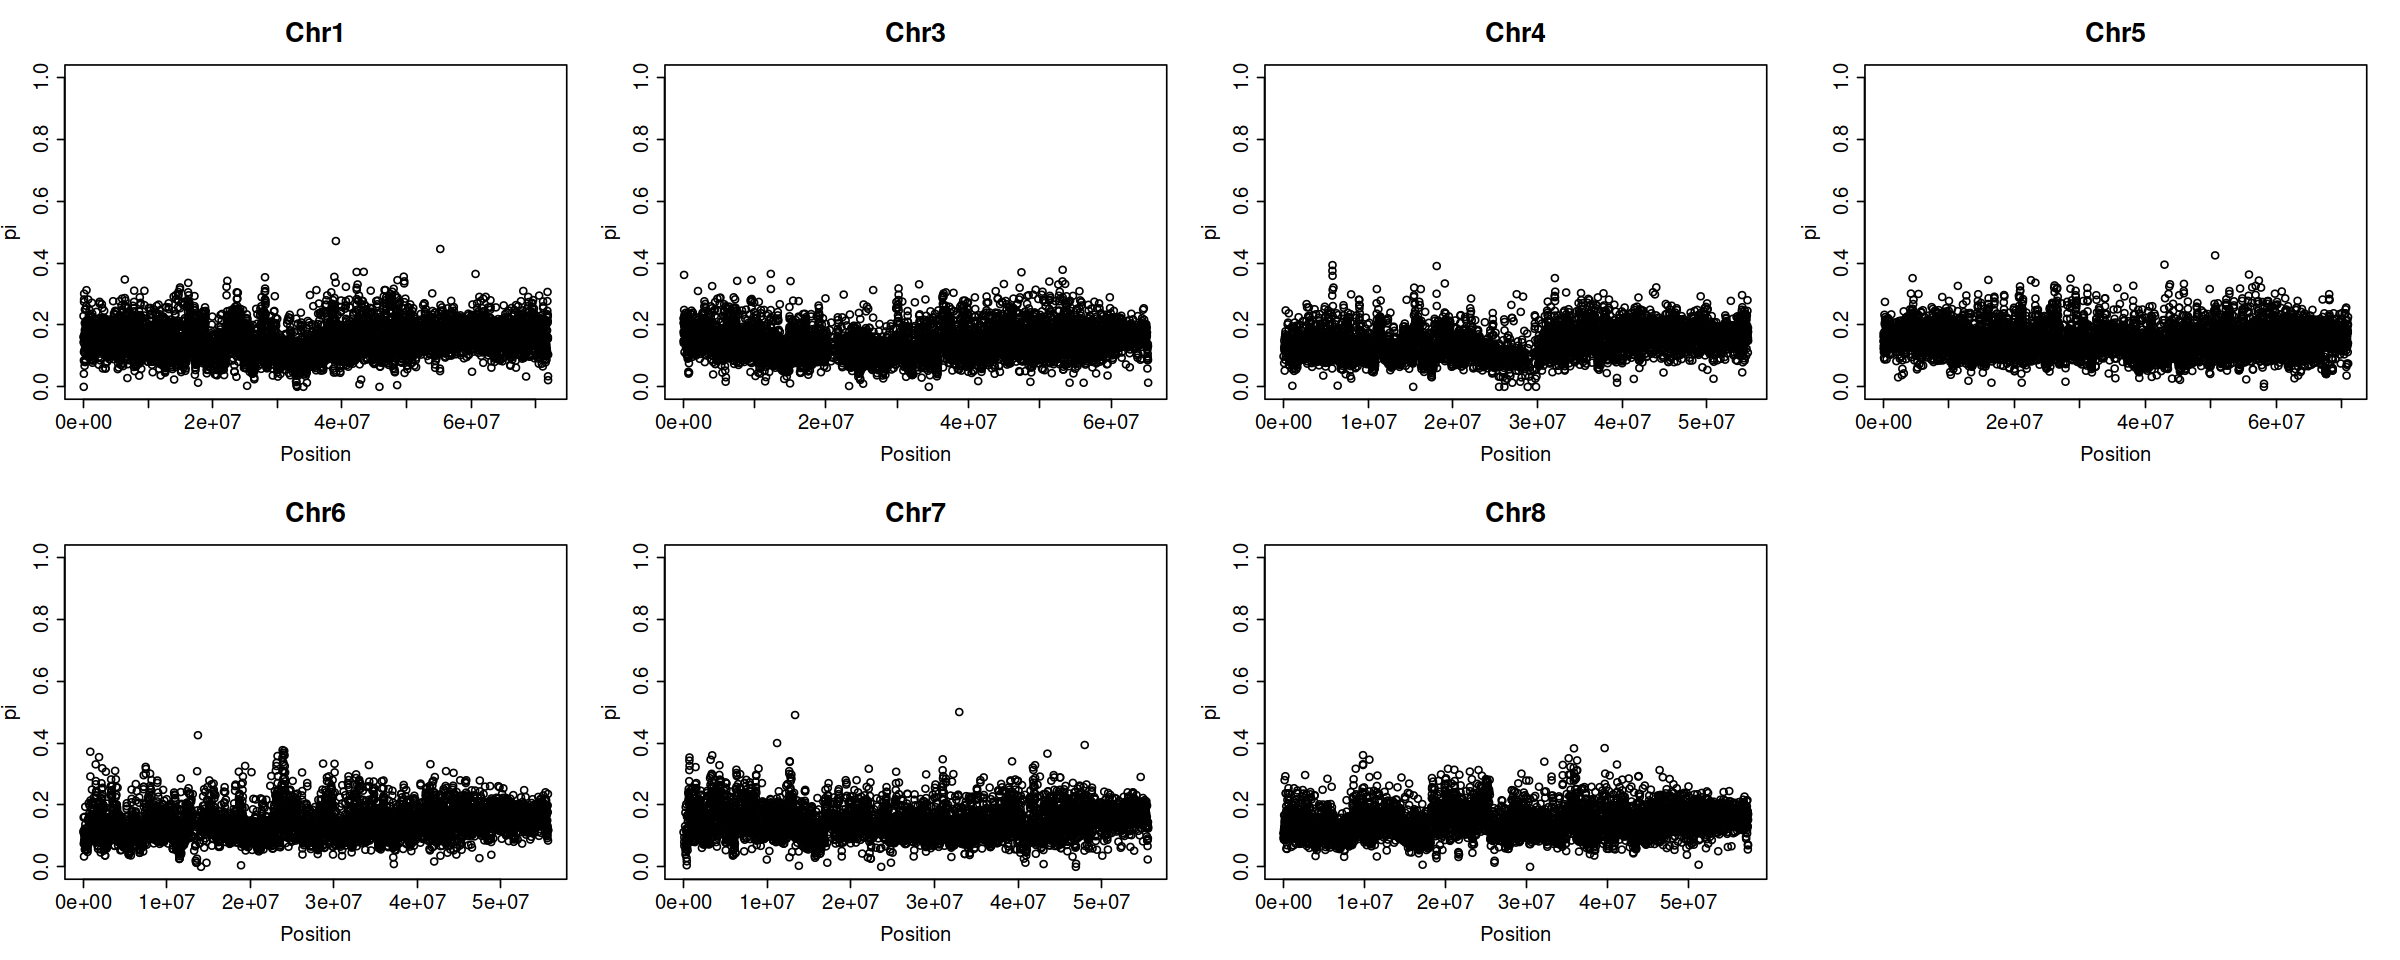

In [45]:
options(repr.plot.width=20, repr.plot.height=8)
xLabel='Position'
yLabel='pi'
# xLimit=
yLimit=c(0,1)

par(mfrow=c(2,4), cex.lab = 1.5, cex.axis = 1.5, cex.main = 2)

plot(Chr1_MY$mid, Chr1_MY$pi_MF, xlab=xLabel, ylab=yLabel, ylim=yLimit, main='Chr1')
plot(Chr3_MY$mid, Chr3_MY$pi_MF, xlab=xLabel, ylab=yLabel, ylim=yLimit, main='Chr3')
plot(Chr4_MY$mid, Chr4_MY$pi_MF, xlab=xLabel, ylab=yLabel, ylim=yLimit, main='Chr4')
plot(Chr5_MY$mid, Chr5_MY$pi_MF, xlab=xLabel, ylab=yLabel, ylim=yLimit, main='Chr5')
plot(Chr6_MY$mid, Chr6_MY$pi_MF, xlab=xLabel, ylab=yLabel, ylim=yLimit, main='Chr6')
plot(Chr7_MY$mid, Chr7_MY$pi_MF, xlab=xLabel, ylab=yLabel, ylim=yLimit, main='Chr7')
plot(Chr8_MY$mid, Chr8_MY$pi_MF, xlab=xLabel, ylab=yLabel, ylim=yLimit, main='Chr8')

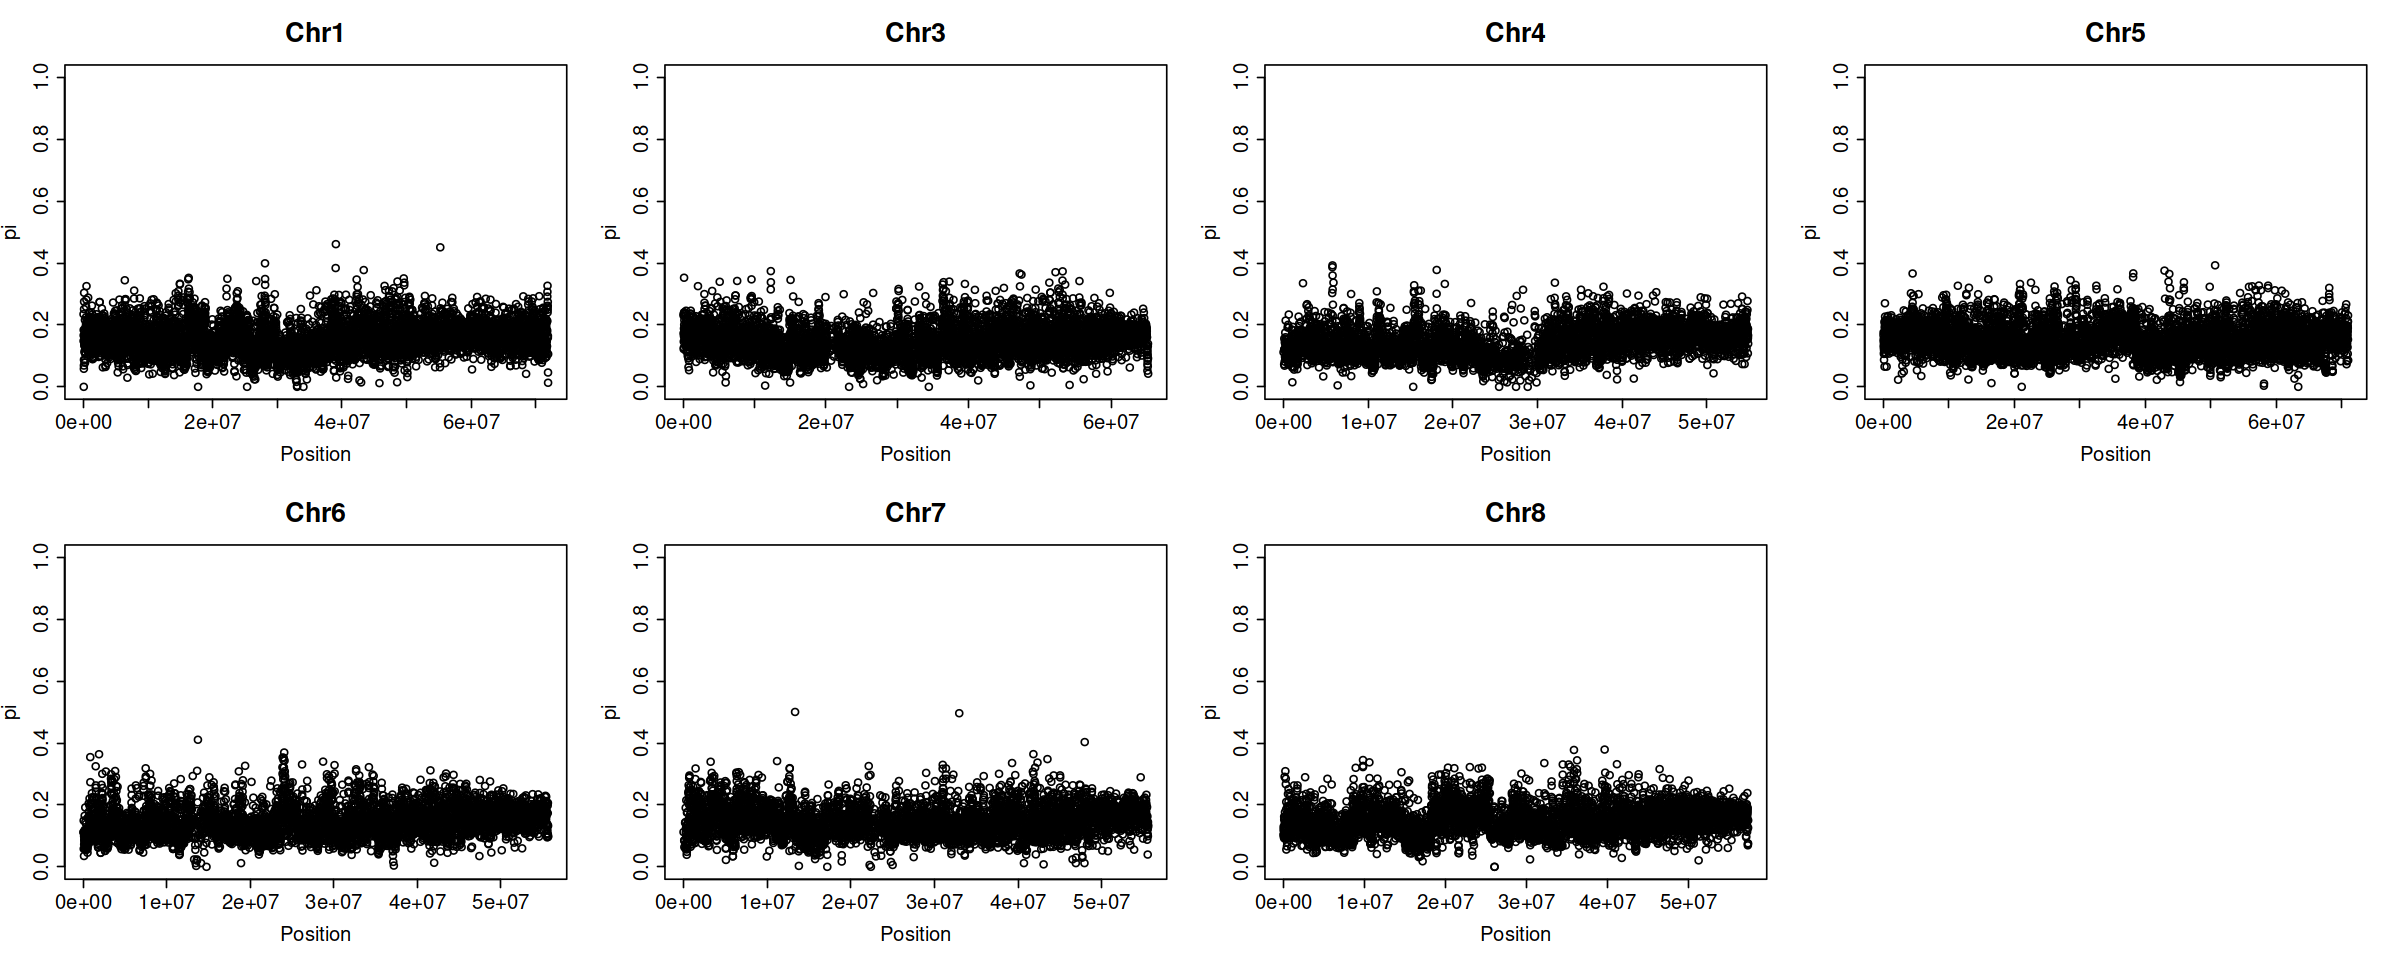

In [46]:
options(repr.plot.width=20, repr.plot.height=8)
xLabel='Position'
yLabel='pi'
# xLimit=
yLimit=c(0,1)

par(mfrow=c(2,4), cex.lab = 1.5, cex.axis = 1.5, cex.main = 2)

plot(Chr1_MY$mid, Chr1_MY$pi_YF, xlab=xLabel, ylab=yLabel, ylim=yLimit, main='Chr1')
plot(Chr3_MY$mid, Chr3_MY$pi_YF, xlab=xLabel, ylab=yLabel, ylim=yLimit, main='Chr3')
plot(Chr4_MY$mid, Chr4_MY$pi_YF, xlab=xLabel, ylab=yLabel, ylim=yLimit, main='Chr4')
plot(Chr5_MY$mid, Chr5_MY$pi_YF, xlab=xLabel, ylab=yLabel, ylim=yLimit, main='Chr5')
plot(Chr6_MY$mid, Chr6_MY$pi_YF, xlab=xLabel, ylab=yLabel, ylim=yLimit, main='Chr6')
plot(Chr7_MY$mid, Chr7_MY$pi_YF, xlab=xLabel, ylab=yLabel, ylim=yLimit, main='Chr7')
plot(Chr8_MY$mid, Chr8_MY$pi_YF, xlab=xLabel, ylab=yLabel, ylim=yLimit, main='Chr8')

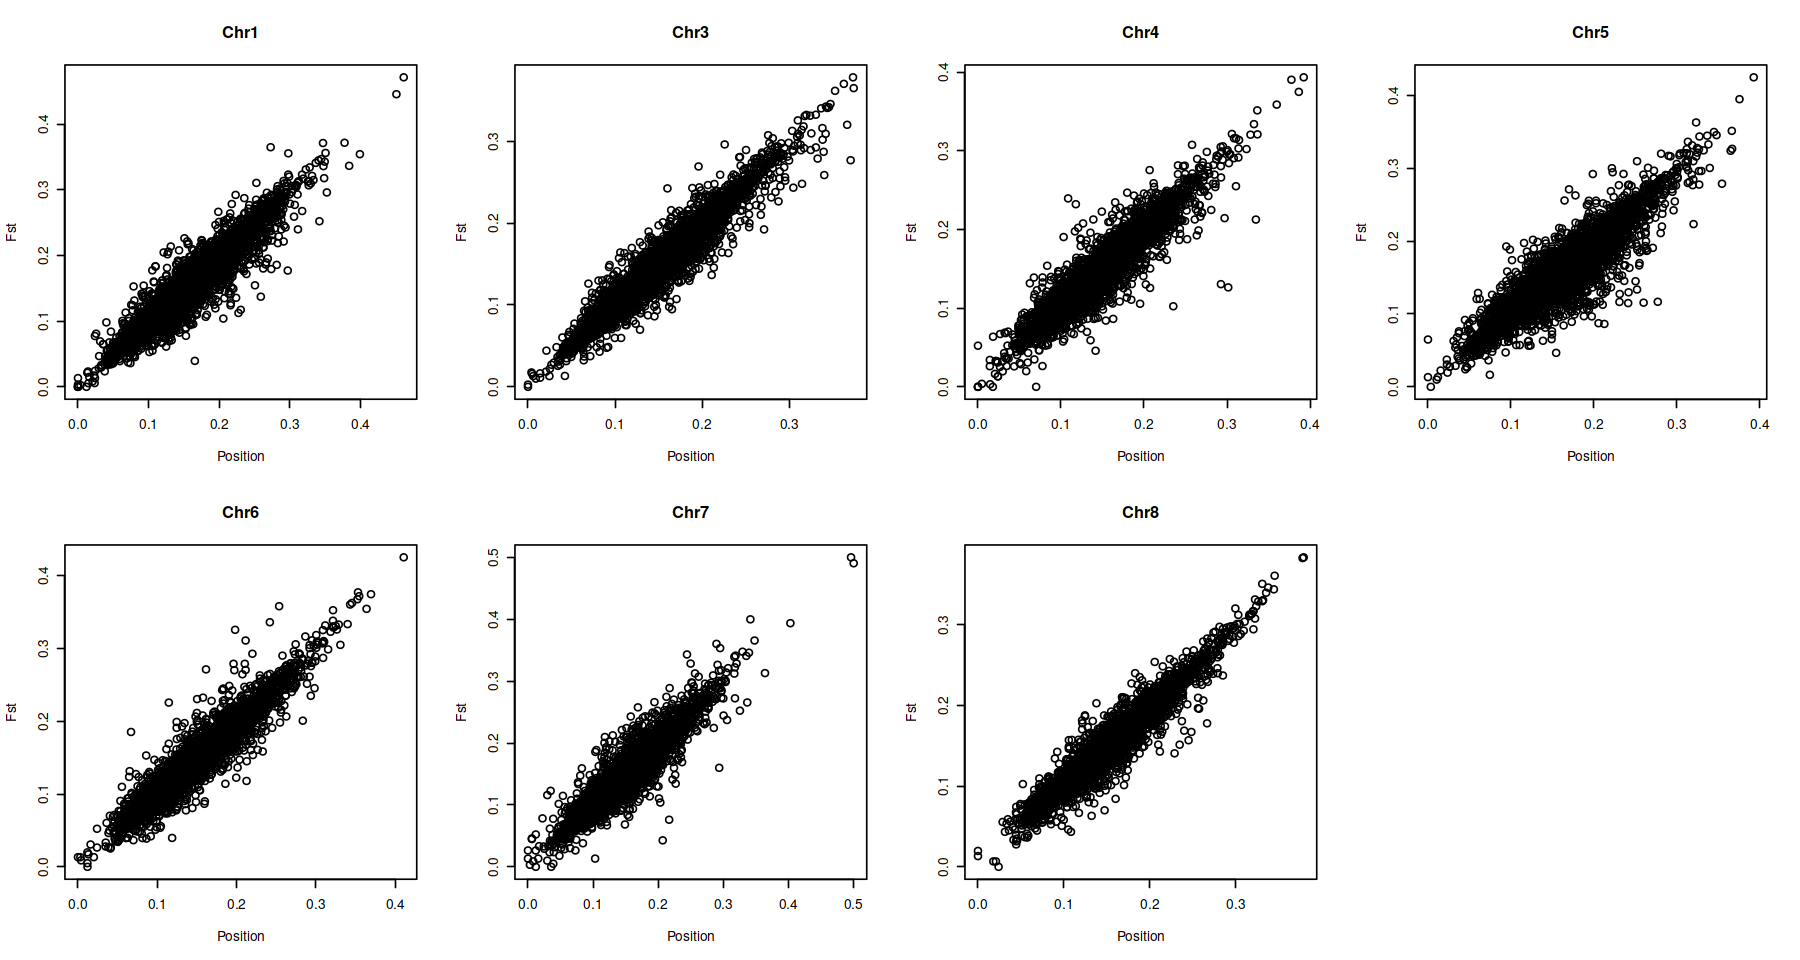

In [79]:
par(mfrow=c(2, 4))
plot(pi_MF~pi_YF, Chr1_MY, xlab=xLabel, ylab=yLabel, main='Chr1')
# plot(pi_MF~pi_YF, Chr2_MY, xlab=xLabel, ylab=yLabel, main='Chr2')
plot(pi_MF~pi_YF, Chr3_MY, xlab=xLabel, ylab=yLabel, main='Chr3')
plot(pi_MF~pi_YF, Chr4_MY, xlab=xLabel, ylab=yLabel, main='Chr4')
plot(pi_MF~pi_YF, Chr5_MY, xlab=xLabel, ylab=yLabel, main='Chr5')
plot(pi_MF~pi_YF, Chr6_MY, xlab=xLabel, ylab=yLabel, main='Chr6')
plot(pi_MF~pi_YF, Chr7_MY, xlab=xLabel, ylab=yLabel, main='Chr7')
plot(pi_MF~pi_YF, Chr8_MY, xlab=xLabel, ylab=yLabel, main='Chr8')

In [83]:
## Ave vs Pla

In [85]:
Chr1_AvePla = fread('./popgenStats/AvePla_Chr1_w10000.csv.gz', header=T)
# Chr2_AvePla = fread('./popgenStats/AvePla_Chr2_w10000.csv.gz', header=T)
Chr3_AvePla = fread('./popgenStats/AvePla_Chr3_w10000.csv.gz', header=T)
Chr4_AvePla = fread('./popgenStats/AvePla_Chr4_w10000.csv.gz', header=T)
Chr5_AvePla = fread('./popgenStats/AvePla_Chr5_w10000.csv.gz', header=T)
Chr6_AvePla = fread('./popgenStats/AvePla_Chr6_w10000.csv.gz', header=T)
Chr7_AvePla = fread('./popgenStats/AvePla_Chr7_w10000.csv.gz', header=T)
Chr8_AvePla = fread('./popgenStats/AvePla_Chr8_w10000.csv.gz', header=T)

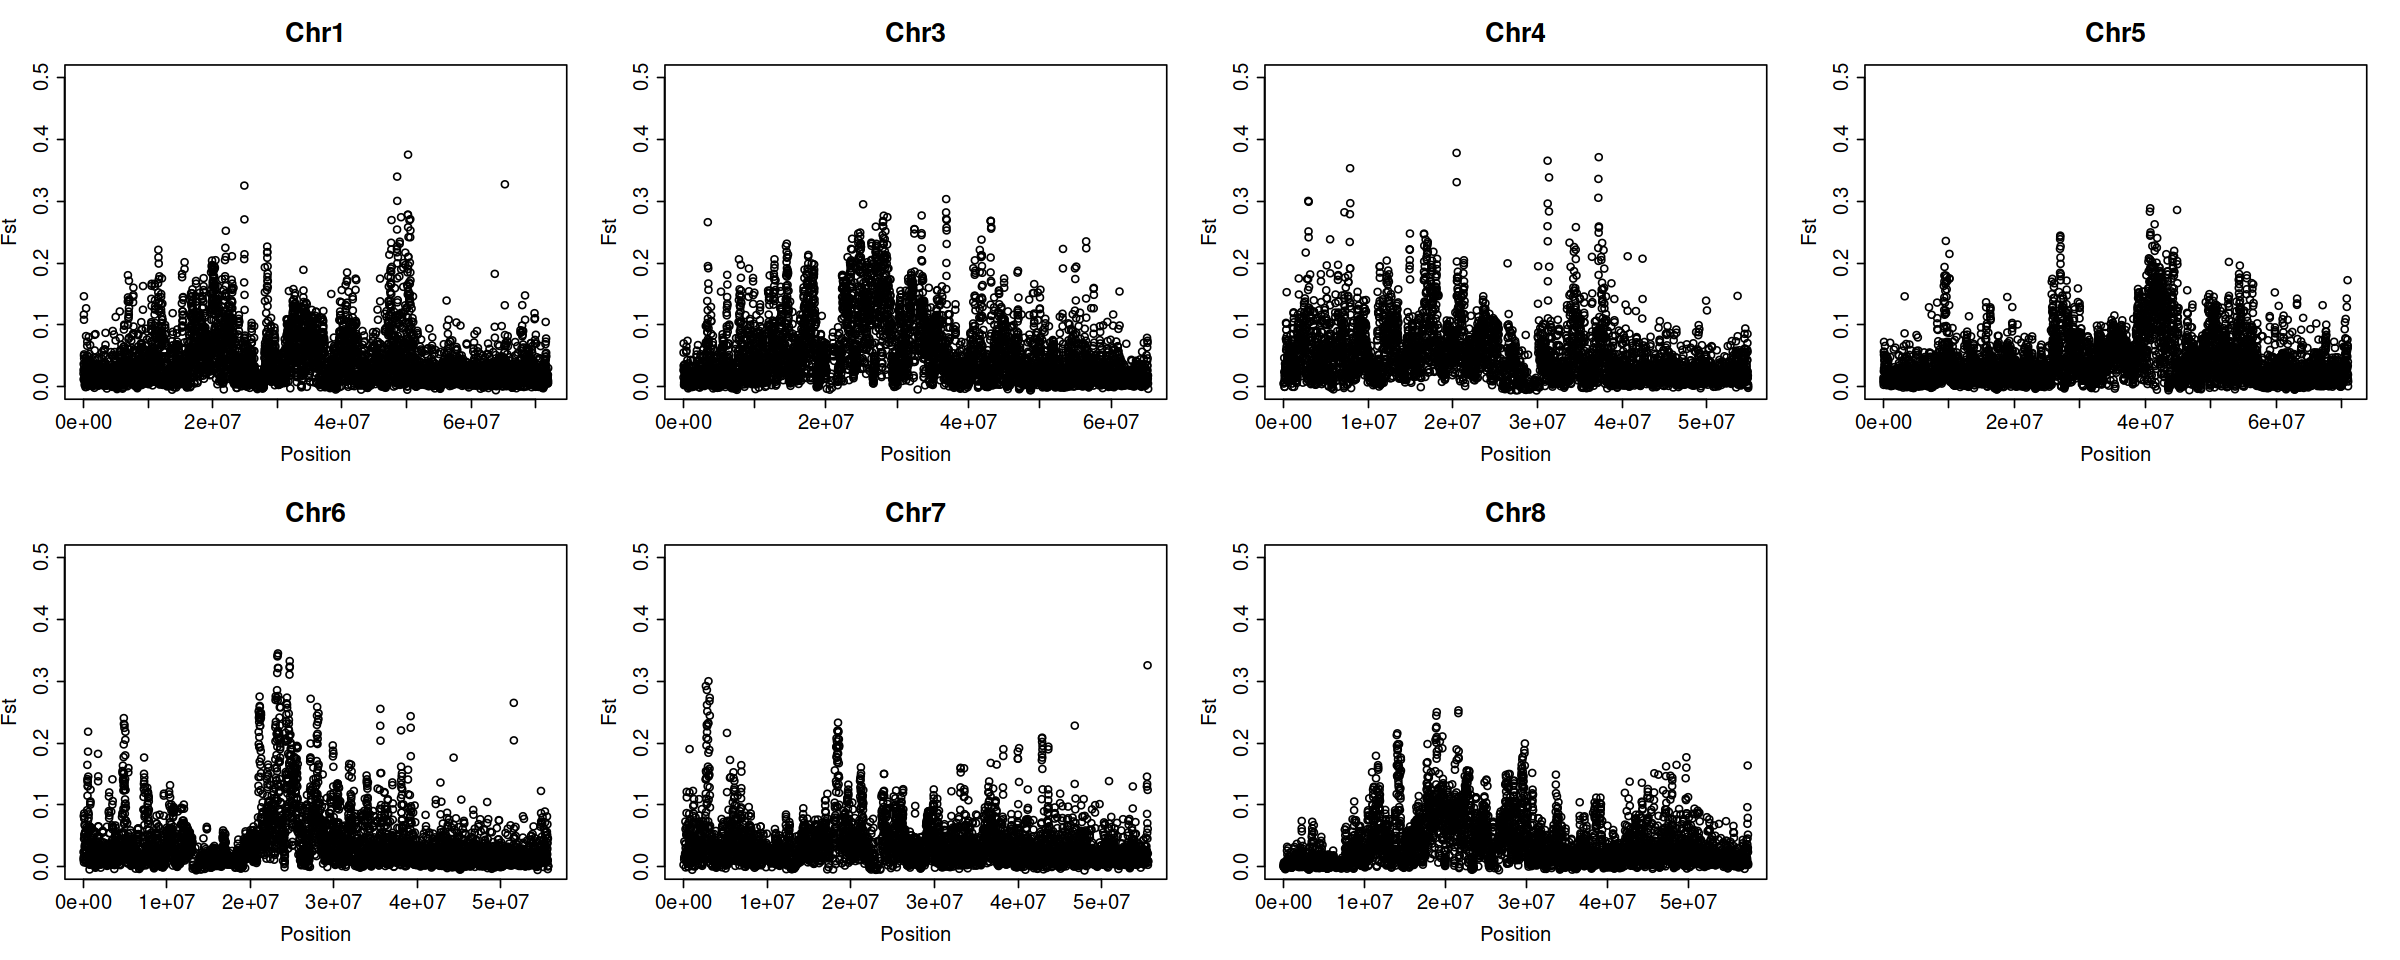

In [87]:
options(repr.plot.width=20, repr.plot.height=8)
xLabel='Position'
yLabel='Fst'
# xLimit=
yLimit=c(0,0.5)

par(mfrow=c(2,4), cex.lab = 1.5, cex.axis = 1.5, cex.main = 2)
plot(Fst_Ave_Pla~mid, Chr1_AvePla, xlab=xLabel, ylab=yLabel, ylim=yLimit, main='Chr1')
# plot(Fst_Ave_Pla~mid, Chr2_AvePla, xlab=xLabel, ylab=yLabel, ylim=yLimit, main='Chr2')
plot(Fst_Ave_Pla~mid, Chr3_AvePla, xlab=xLabel, ylab=yLabel, ylim=yLimit, main='Chr3')
plot(Fst_Ave_Pla~mid, Chr4_AvePla, xlab=xLabel, ylab=yLabel, ylim=yLimit, main='Chr4')
plot(Fst_Ave_Pla~mid, Chr5_AvePla, xlab=xLabel, ylab=yLabel, ylim=yLimit, main='Chr5')
plot(Fst_Ave_Pla~mid, Chr6_AvePla, xlab=xLabel, ylab=yLabel, ylim=yLimit, main='Chr6')
plot(Fst_Ave_Pla~mid, Chr7_AvePla, xlab=xLabel, ylab=yLabel, ylim=yLimit, main='Chr7')
plot(Fst_Ave_Pla~mid, Chr8_AvePla, xlab=xLabel, ylab=yLabel, ylim=yLimit, main='Chr8')

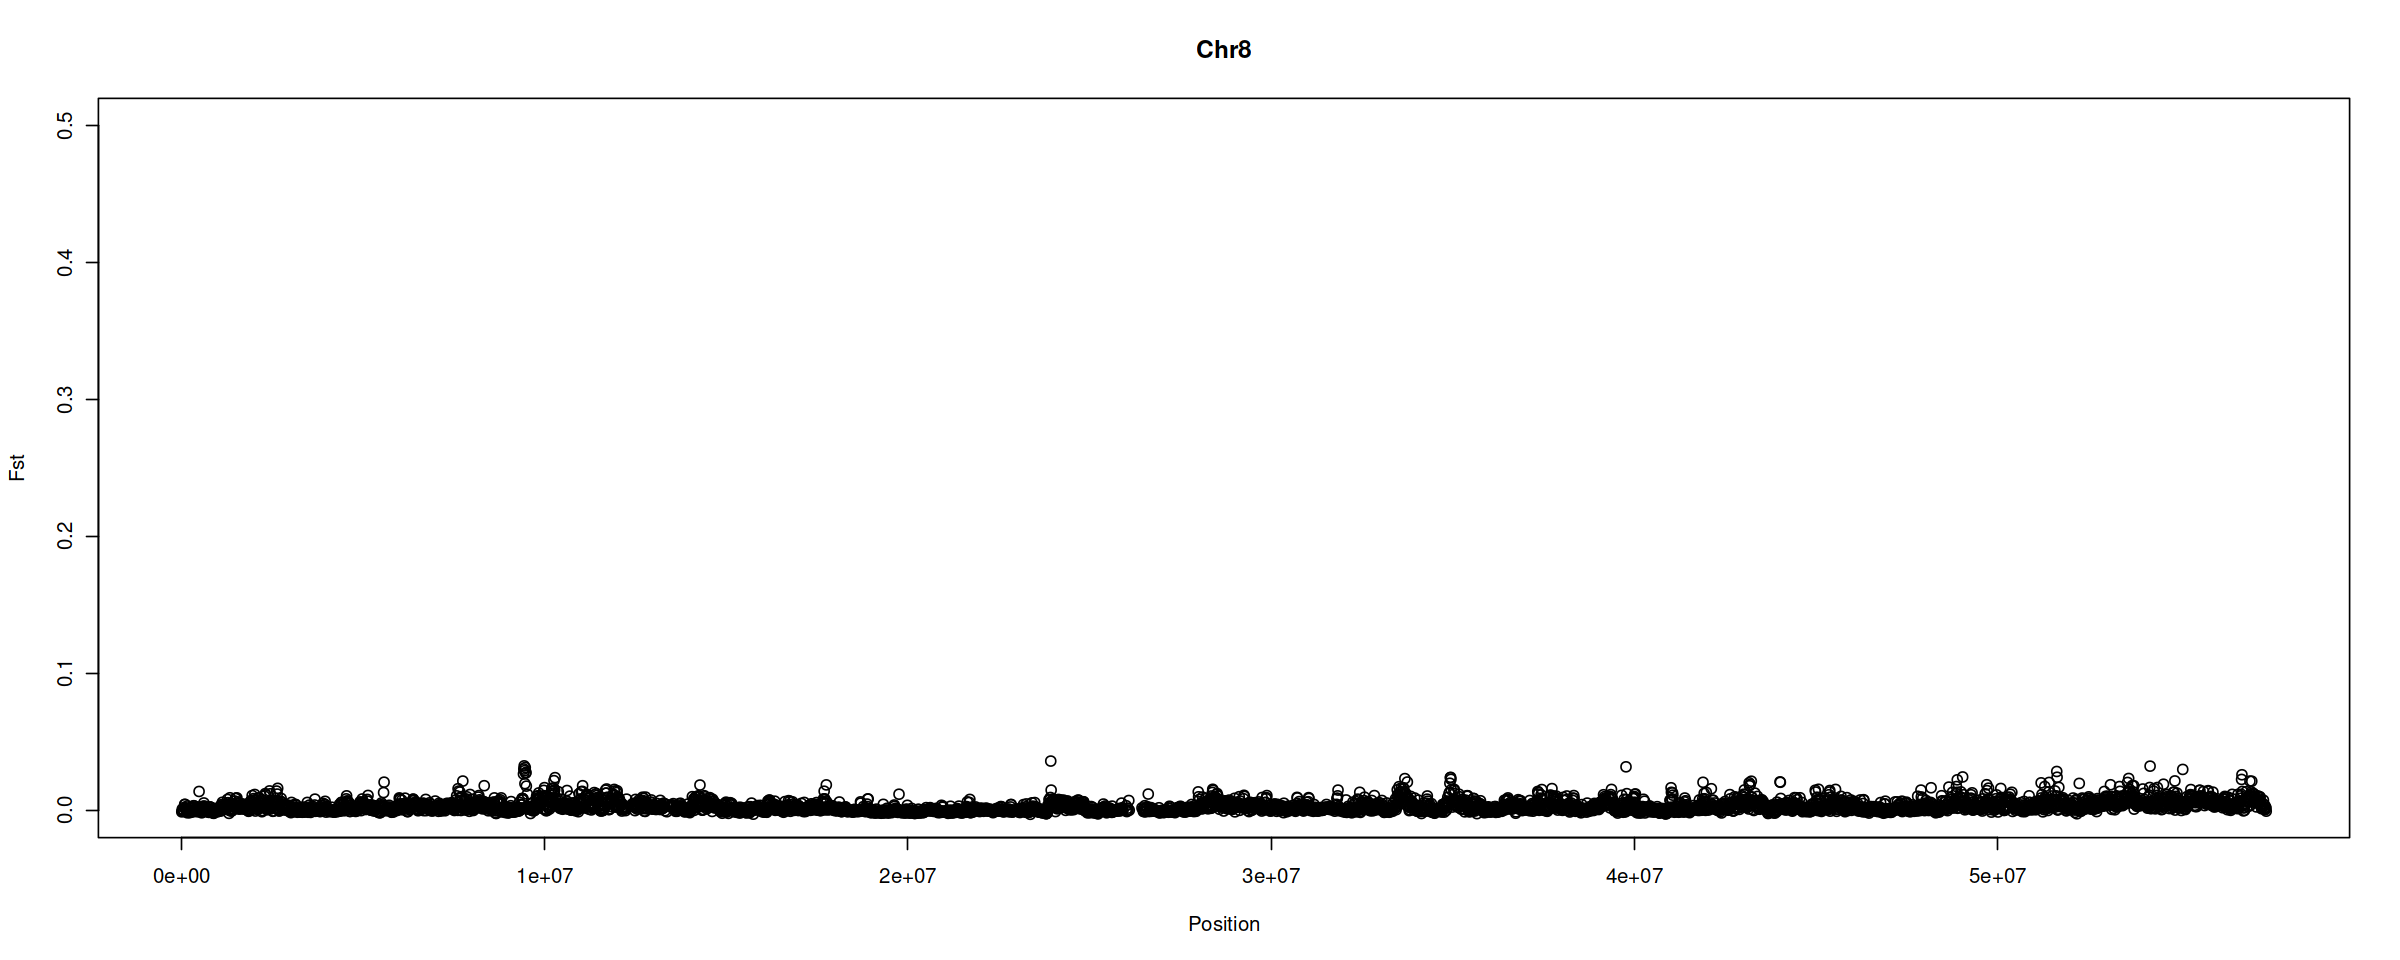

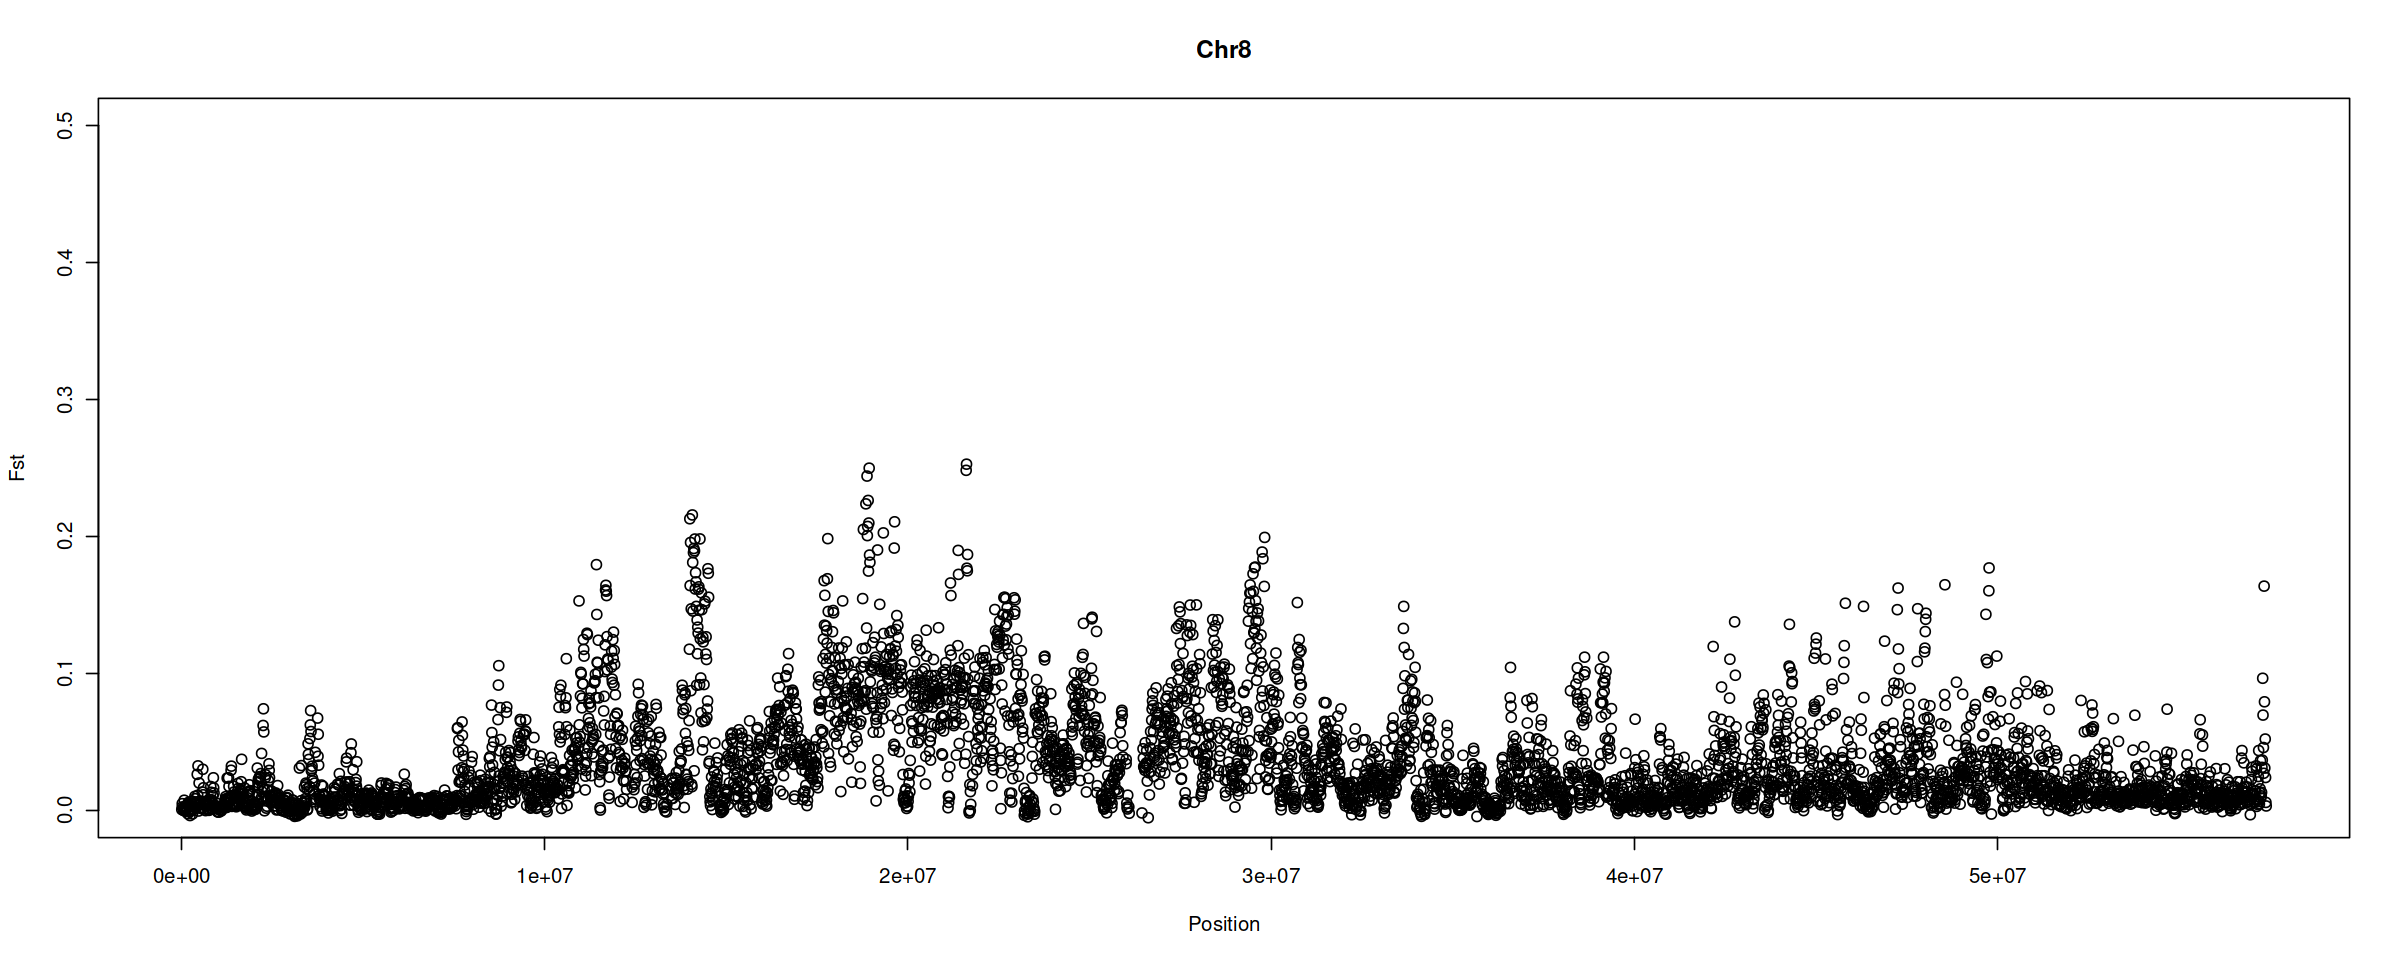

In [90]:
# options(repr.plot.wi)
par(mfrow=c(1,1))
plot(Fst_MF_YF~mid, Chr8_MY, xlab=xLabel, ylab=yLabel, ylim=yLimit, main='Chr8')
plot(Fst_Ave_Pla~mid, Chr8_AvePla, xlab=xLabel, ylab=yLabel, ylim=yLimit, main='Chr8')

In [ ]:
par(mfrow=c(1,1))
plot(Fst_MF_YF~mid, Chr8_MY, xlab=xLabel, ylab=yLabel, ylim=yLimit, main='Chr8')

In [47]:
## Read allele frequencies
baseDIR='~/snap_hap/genome_scans'
maf = foreach (chrom in c(1:8), .combine = rbind) %do% {
    filename=file.path(baseDIR, "alleleFreq", paste0("MY_Chr",chrom.".MAF.csv.gz"))
    tmp = fread(filename, header=TRUE)
    tmp
}

ERROR: Error in parse(text = x, srcfile = src): <text>:3:22: unexpected 'in'
2: baseDIR='~/snap_hap/genome_scans'
3: maf = foreach (chrom in
                        ^


In [48]:
maf = maf %>% rowwise() %>% mutate(dp = MF-YF)

In [49]:
maf = as.data.table(maf)
str(maf)

Classes ‘data.table’ and 'data.frame':	19925574 obs. of  6 variables:
 $ scaffold   : chr  "Chr1" "Chr1" "Chr1" "Chr1" ...
 $ position   : int  3817 3850 3873 3881 3917 3922 3946 3981 3992 3994 ...
 $ MF         : num  0.2667 0.18 0 0.0067 0.4 ...
 $ YF         : num  0.256 0.259 0.012 0 0.416 ...
 $ dp         : num  0.0106 -0.079 -0.012 0.0067 -0.0157 ...
 $ chromNumber: num  1 1 1 1 1 1 1 1 1 1 ...
 - attr(*, "groups")= tibble [19,925,574 × 1] (S3: tbl_df/tbl/data.frame)
  ..$ .rows: list<int> [1:19925574] 
  .. ..$ : int 1
  .. ..$ : int 2
  .. ..$ : int 3
  .. ..$ : int 4
  .. ..$ : int 5
  .. ..$ : int 6
  .. ..$ : int 7
  .. ..$ : int 8
  .. ..$ : int 9
  .. ..$ : int 10
  .. ..$ : int 11
  .. ..$ : int 12
  .. ..$ : int 13
  .. ..$ : int 14
  .. ..$ : int 15
  .. ..$ : int 16
  .. ..$ : int 17
  .. ..$ : int 18
  .. ..$ : int 19
  .. ..$ : int 20
  .. ..$ : int 21
  .. ..$ : int 22
  .. ..$ : int 23
  .. ..$ : int 24
  .. ..$ : int 25
  .. ..$ : int 26
  .. ..$ : int 27
  .. ..

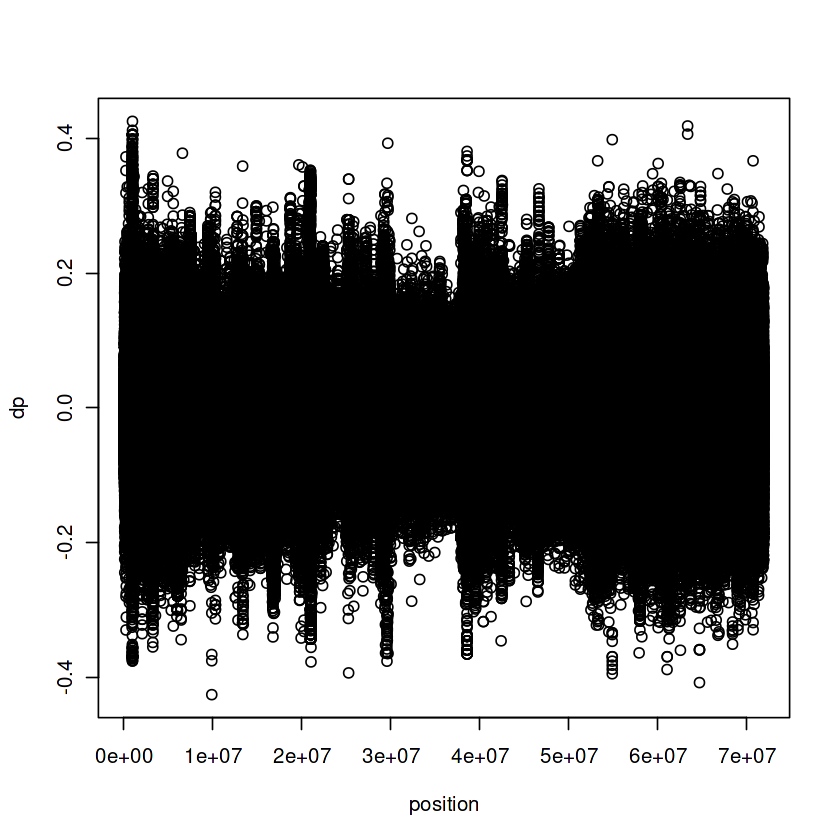

In [50]:
plot(dp~position, maf[scaffold=='Chr1'])